<a href="https://colab.research.google.com/github/Timecapp/FourthAssignments/blob/Timecapp-nb/week4_Shais_walmart_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# EDA with Walmart Sales Data

## Business Objectives

Walmart, the retail giant that operates a chain of hypermarkets, wants to understand their weekly sales data, especially the impact from holidays and or big events on the weekly sales data; specifically, Super Bowl, Labor Day, Thanksgiving, and Christmas. In addition, Walmart wants to consider the effect from different macroeconomic/external factors. 

## Learning Objectives

At the end of this session, you will know how to

1. Manipulate data of different types using `pandas`
1. Visualize data with `matplotlib` and `seaborn` to extract insights 
1. Perform feature engineering
1. Build a pipeline to preprocess data and fit a simple model using `sklearn`

*Note: if you see code that's unfamiliar to you, look up for the documentation, and try to understand what it does.*

## Data Overview

- Original sales data were collected from 45 stores across the United States; yet for this session, you will first inspect data from three stores and later focus on just store 1. 

- Each store is of certain type and size, and there are multiple departments in a store. 

- The dataset has a temporal component, we ignore this mostly in this session and will discuss time series related techniques later in the cohort.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import warnings
warnings.filterwarnings("ignore")

## Task I: Load Data 

Built on top of `numpy`, `pandas` is one of the most widely used tools in machine learning. Its rich features are used for exploring, cleaning, visualizing, and transforming data.  We need to import the library to access all of its features. 

In [ ]:
import pandas as pd

Use `pd.read_csv` to read `train_comb.csv` that contains weekly sales, metadata, and macroeconomic features from three stores into a `pd.DataFrame`.

In [ ]:
filepath = 'https://raw.githubusercontent.com/Timecapp/MLE-10/main/assignments/week-04-data-eng-airflow/dat/train_comb.csv?token=GHSAT0AAAAAAB2YJ7QE62XRPGW64JJQKNPCY3OIY2Q'
walmart_sls = pd.read_csv(filepath) 

In [ ]:
type(walmart_sls)

pandas.core.frame.DataFrame

In [ ]:
walmart_sls.head()

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     1  2010-02-12      46039.49       True        38.51       2.548   
2      1     1  2010-02-19      41595.55      False        39.93       2.514   
3      1     1  2010-02-26      19403.54      False        46.63       2.561   
4      1     1  2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

Verify that the data is loaded correctly by running `data.head(3)` to see the first few row ( AVOID printing out the entire DataFrame, i.e., `data` or `print(data)`; it might be trivial for small dataset but it can crash your kernel when the dataset is big and slow down the initial data exploration process ).

In [ ]:
# Convert date to datetime format 
walmart_sls['Date'] =  pd.to_datetime(walmart_sls['Date'])
walmart_sls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30990 entries, 0 to 30989
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         30990 non-null  int64         
 1   Dept          30990 non-null  int64         
 2   Date          30990 non-null  datetime64[ns]
 3   Weekly_Sales  30990 non-null  float64       
 4   IsHoliday     30990 non-null  bool          
 5   Temperature   30990 non-null  float64       
 6   Fuel_Price    30990 non-null  float64       
 7   MarkDown1     11062 non-null  float64       
 8   MarkDown2     9260 non-null   float64       
 9   MarkDown3     10779 non-null  float64       
 10  MarkDown4     10990 non-null  float64       
 11  MarkDown5     11062 non-null  float64       
 12  CPI           30990 non-null  float64       
 13  Unemployment  30990 non-null  float64       
 14  Type          30990 non-null  object        
 15  Size          30990 non-null  int64 

In [ ]:
walmart_sls.head(3)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     1  2010-02-12      46039.49       True        38.51       2.548   
2      1     1  2010-02-19      41595.55      False        39.93       2.514   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315

In [ ]:
walmart_sls.sample(3)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
18280      4    79  2011-11-25     56,756.50       True        47.96   
24198     13    27  2012-08-24      2,666.51      False        77.37   
2110       1    16  2012-03-02     30,451.14      False        60.96   

       Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
18280        3.23     561.45     137.88  83,340.33      44.04   9,239.23   
24198        3.58   9,360.80      71.92     179.51   8,290.49   6,291.99   
2110         3.63  15,441.40   1,569.00      10.80  25,390.88   8,067.61   

         CPI  Unemployment Type    Size  
18280 129.84          5.14    A  205863  
24198 130.84          5.76    A  219622  
2110  220.85          7.35    A  151315

❓ Question 1:

Look at the output to get an idea of what each column is and then write a few sentences describing what you notice about the data. You can also use `data.sample(3)` to draw random samples from the data (hints: number of rows and columns, any missing values? data types of the elements? date ranges of the data collected? etc.).

  The data is not all numbers, there are NaNs and False values in many cells; with sls head 3, only rows 0,1,2 show up BUT, with sample(3) we see row 24,000 and 2,100, so we know how big the table is.  Type says A for all 3, this data represents the sales data spreadsheet, and the values are not all numerical and/or some values are either 0 or missing or not numbers.  this needs data cleaning before we do training and testing.

*Acceptable responses include the number of rows and columns in the dataset, the data types of the elements, how many NaNs there are (and perhaps which columns and/or rows tend to have them), the range of values in each column or other descriptive statistics, some commentary on what this data represents, any initial concerns about how you think we should model this data, or any other commentary you would like to add.*

Use `.shape` to inspect the size of the data: sample size and number of features.

In [ ]:
walmart_sls.shape

(30990, 16)

<details>
<summary>Expected Output</summary>
(30990, 16)
</details>

For the following task, we focus on Store `1` only, 

In [ ]:
data_store1 = walmart_sls[walmart_sls.Store==1]

In [ ]:
data_store1.tail(3)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
10241      1    99  2012-09-14          0.03      False        74.97   
10242      1    99  2012-10-05        635.00      False        68.55   
10243      1    99  2012-10-12         80.00      False        62.99   

       Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
10241       3.717   17212.52        7.0      18.79    1523.11    7992.72   
10242       3.617    8077.89        NaN      18.22    3617.43    3626.14   
10243       3.601    2086.18        NaN       8.11     602.36    5926.45   

              CPI  Unemployment Type    Size  
10241  222.582019         6.908    A  151315  
10242  223.181477         6.573    A  151315  
10243  223.381296         6.573    A  151315

Retrieve the data from department 9 ( a random choice ) at store 1:

In [ ]:
data_store1_dept9 = data_store1[data_store1.Dept == 9] 

Verify the result using `.head()`, `.shape`.

In [ ]:
data_store1_dept9.head()
data_store1_dept9.shape

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
1144      1     9  2010-02-05      16930.99      False        42.31   
1145      1     9  2010-02-12      16562.49       True        38.51   
1146      1     9  2010-02-19      15880.85      False        39.93   
1147      1     9  2010-02-26      15175.52      False        46.63   
1148      1     9  2010-03-05      24064.70      False        46.50   

      Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
1144       2.572        NaN        NaN        NaN        NaN        NaN   
1145       2.548        NaN        NaN        NaN        NaN        NaN   
1146       2.514        NaN        NaN        NaN        NaN        NaN   
1147       2.561        NaN        NaN        NaN        NaN        NaN   
1148       2.625        NaN        NaN        NaN        NaN        NaN   

             CPI  Unemployment Type    Size  
1144  211.096358         8.106    A  151315  
1145  211.242170         8.106    A  151315  
1146  211.289143         8.106    A  151315  
1147  211.319643         8.106    A  151315  
1148  211.350143         8.106    A  151315

(143, 16)

<details>
<summary>Expected Output</summary>
(143, 16)
</details>


Visualize one full year of sales. The data came with dates sorted, but we can make sure of it and then visualize the first 52 data  points.

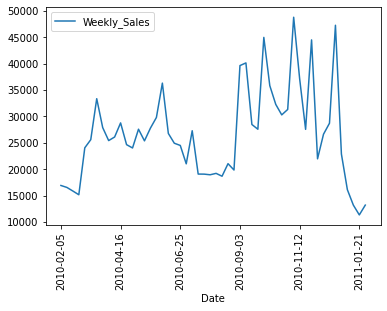

In [ ]:
data_store1_dept9 = data_store1_dept9.sort_values('Date')
data_store1_dept9[['Date', 'Weekly_Sales']].iloc[:52]\
    .set_index('Date').plot(rot=90);

❓ Question 2:

Do you have any hypotheses about the holidays' impact on the sales?

IN 2010, after after September and all the way to Jan 2011, the sales overall are much higher (Christmas time); the peaks are almost double the values for April and June of 2010; so holidays increase sales.

**For the purpose of this notebook, we focus on the sales data from Store 1** in DataFrame `df` and is saved in `train_store1.csv`. Let's read in the data.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Timecapp/MLE-10/main/assignments/week-04-data-eng-airflow/dat/train-store1.csv?token=GHSAT0AAAAAAB2YJ7QE23KGUG54M6M5QGIGY3OIZVA")

Extract week, month, and year information from the raw `Date` column to better manipulate the weekly data later. Pandas comes with powerful features to make this step easy. Reference: [tutorial
](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html). 

First, use `.dtypes` to check the datatype of the `Date` column. What's the difference between `df[['Date']]` and `df['Date']`?.

In [ ]:
# Print a list datatypes of all columns
 
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

<details>
<summary>Expected Output</summary>
Date    object
dtype: object
</details>

In [ ]:
df.Date=pd.to_datetime(df.Date)

Verify that the `Date` column's datatype has changed as expected:

In [ ]:
df[['Date']].dtypes 

Date    datetime64[ns]
dtype: object

In [ ]:
df['week'] = df.Date.dt.week
df['month'] = df.Date.dt.month 
df['year'] = df.Date.dt.year 

Verify that now there are 19 columns in `df`:

In [ ]:
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print(df)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

       Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0          1     1 2010-02-05      24924.50      False        42.31   
1          1     1 2010-02-12      46039.49       True        38.51   
2          1     1 2010-02-19      41595.55      False        39.93   
3          1     1 2010-02-26      19403.54      False        46.63   
4          1     1 2010-03-05      21827.90      False        46.50   
...      ...   ...        ...           ...        ...          ...   
10239      1    99 2012-08-31         20.06      False        80.49   
10240      1    99 2012-09-07          0.05       True        83.96   
10241      1    99 2012-09-14          0.03      False        74.97   
10242      1    99 2012-10-05        635.00      False        68.55   
10243      1    99 2012-10-12         80.00      False        62.99   

       Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0           2.572        NaN        NaN        NaN        NaN        Na

In [ ]:
# Print a list datatypes of all columns
 
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object

In [ ]:
# Checking the Data Type of a Particular Column
df['Weekly_Sales'].dtypes


dtype('float64')

❓ Question 3:

Last step before we look deeper into the features is to split the data set into training and testing datasets. Discuss: why do we want to perform EDA only on the training data, not the entire dataset? Shouldn't it be the more the better?

1. Training looks at correct answers for creating the best model. Information from EDA will help me to decide which model to use, which parameters need tweaking and data cleaning; so this should be done before putting access to the test data. 
2. Data Leakage refers to a mistake made by the creator of the model where they accidentally share the information between the test and training data sets - this should not happen normally because the purpose of the testing set is to simulate the real-world data which is unseen to that model.  If it happens , the model is already aware of some part of test data after training causing the problem of overfitting. so we should separate them.

Split the data into training (80%) and test dataset (20%). Use function `train_test_split` from `scikit-learn` ( a popular library for machine learning in Python ),  and set `random_state` to be 42 for reproducibility ( this is not the best way to do train-test-split due to the temporal nature of the data, however, we will ignore it for now ).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split two arrays
train_test_split(df, test_size=0.2, random_state=42)


[      Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
 4549      1    34 2010-02-26      12005.00      False        46.63   
 6496      1    52 2012-07-06       2377.08      False        81.57   
 550       1     4 2012-06-01      41566.55      False        77.95   
 7235      1    60 2010-06-04       1144.00      False        80.69   
 2519      1    19 2012-05-11       1848.79      False        73.77   
 ...     ...   ...        ...           ...        ...          ...   
 5734      1    44 2010-12-10       6310.08      False        46.33   
 5191      1    38 2011-07-01      68879.85      False        85.55   
 5390      1    40 2012-07-27      53286.98      False        82.66   
 860       1     7 2010-02-19      19985.20      False        39.93   
 7270      1    60 2011-02-04       1188.00      False        42.27   
 
       Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
 4549       2.561        NaN        NaN        NaN        NaN        N

In [ ]:
# Split and Label the Data
df_train, df_test = train_test_split(df)
df_train['Type'] = 'Train'
df_test['Type'] = 'Test'

# Combine the Data
final_df = df_train.append(df_test)

In [ ]:
print('Original set  ---> ',df.shape,
      '\nTraining set  ---> ',df_train.shape,
      '\nTesting set   ---> ', df_test.shape)

Original set  --->  (10244, 19) 
Training set  --->  (7683, 19) 
Testing set   --->  (2561, 19)


<details>
<summary>Expected Output</summary>

    ```
    Original set  --->  (10244, 19) 
    Training set  --->  (8195, 19) 
    Testing set   --->  (2049, 19)
    ```
</details>

## Task II: Target, Features, and Distributions

We inspect the datatype of column `Date`; now find datatypes for all columns in `df_train` using `.dtypes`:

In [ ]:
df_train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object

<details>
<summary>Expected Output</summary>

```
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object
```
</details>

Summary statistics provide you with a general understanding of the data. Use method `.describe()`. By default it reports statistics mean, max, min, quantiles for numerical features and counts, unique, mode for categorical features.

In [ ]:
#summary stats
pd.options.display.float_format = "{:,.2f}".format
df.describe()

Store      Dept  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
count 10,244.00 10,244.00     10,244.00    10,244.00   10,244.00   3,657.00   
mean       1.00     44.39     21,710.54        68.22        3.22   8,086.73   
std        0.00     29.87     27,748.95        14.20        0.43   6,542.42   
min        1.00      1.00       -863.00        35.40        2.51     410.31   
25%        1.00     20.00      3,465.62        57.79        2.76   4,039.39   
50%        1.00     38.00     10,289.38        69.64        3.29   6,154.14   
75%        1.00     72.00     31,452.96        80.48        3.59  10,121.97   
max        1.00     99.00    203,670.47        91.65        3.91  34,577.06   

       MarkDown2  MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  \
count   3,015.00   3,588.00   3,657.00   3,657.00 10,244.00     10,244.00   
mean    2,967.16   1,245.40   3,755.21   5,027.75    216.00          7.61   
std     7,911.85   7,867.46   5,950.68   3,267.92      4.34          0.38   
min         0.50       0.25       8.00     554.92    210.34          6.57   
25%        40.48       6.00     577.14   3,127.88    211.53          7.35   
50%       137.86      30.23   1,822.55   4,325.19    215.46          7.79   
75%     1,569.00     101.64   3,750.59   6,222.25    220.64          7.84   
max    46,011.38  55,805.51  32,403.87  20,475.32    223.44          8.11   

            Size      week     month      year  
count  10,244.00 10,244.00 10,244.00 10,244.00  
mean  151,315.00     25.84      6.45  2,010.96  
std         0.00     14.17      3.25      0.80  
min   151,315.00      1.00      1.00  2,010.00  
25%   151,315.00     14.00      4.00  2,010.00  
50%   151,315.00     26.00      6.00  2,011.00  
75%   151,315.00     38.00      9.00  2,012.00  
max   151,315.00     52.00     12.00  2,012.00

<details>
<summary>Expected Output</summary>

```
	Store	Dept	Weekly_Sales	Temperature	Fuel_Price	MarkDown1	MarkDown2	MarkDown3	MarkDown4	MarkDown5	CPI	Unemployment	Size	week	month	year
count	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	2,931.00	2,424.00	2,878.00	2,931.00	2,931.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00
mean	1.00	44.65	21,865.28	68.19	3.22	8,045.43	2,961.55	1,236.83	3,683.59	5,023.69	216.00	7.61	151,315.00	25.89	6.47	2,010.96
std	0.00	29.95	27,970.00	14.16	0.43	6,484.49	8,032.30	7,830.99	5,849.69	3,303.07	4.33	0.38	0.00	14.19	3.25	0.80
min	1.00	1.00	-863.00	35.40	2.51	410.31	0.50	0.25	8.00	554.92	210.34	6.57	151,315.00	1.00	1.00	2,010.00
25%	1.00	20.00	3,502.09	57.79	2.76	4,039.39	40.48	6.00	577.14	3,127.88	211.57	7.35	151,315.00	14.00	4.00	2,010.00
50%	1.00	38.00	10,357.32	69.64	3.29	6,154.14	137.86	30.23	1,822.55	4,325.19	215.46	7.79	151,315.00	26.00	6.00	2,011.00
75%	1.00	72.00	31,647.36	80.48	3.59	10,121.97	1,569.00	101.64	3,639.42	6,222.25	220.64	7.84	151,315.00	38.00	9.00	2,012.00
max	1.00	99.00	203,670.47	91.65	3.91	34,577.06	46,011.38	55,805.51	32,403.87	20,475.32	223.44	8.11	151,315.00	52.00	12.00	2,012.0
```
</details>

❓ Question 4:

Inspect the output, what are some of your observations?

- All the columns get the stat summary descriptions,
- there are non zero or missing values 
- shows you the changes in stats at different %iles (25, 50 and 75 and max)

Are there any missing values? Use `.isna()` and `.sum()` to show the number of missing values from each column.

In [ ]:
df.isna()
df.isna().sum()

Store   Dept   Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      False  False  False         False      False        False       False   
1      False  False  False         False      False        False       False   
2      False  False  False         False      False        False       False   
3      False  False  False         False      False        False       False   
4      False  False  False         False      False        False       False   
...      ...    ...    ...           ...        ...          ...         ...   
10239  False  False  False         False      False        False       False   
10240  False  False  False         False      False        False       False   
10241  False  False  False         False      False        False       False   
10242  False  False  False         False      False        False       False   
10243  False  False  False         False      False        False       False   

       MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5    CPI  \
0           True       True       True       True       True  False   
1           True       True       True       True       True  False   
2           True       True       True       True       True  False   
3           True       True       True       True       True  False   
4           True       True       True       True       True  False   
...          ...        ...        ...        ...        ...    ...   
10239      False      False      False      False      False  False   
10240      False      False      False      False      False  False   
10241      False      False      False      False      False  False   
10242      False       True      False      False      False  False   
10243      False       True      False      False      False  False   

       Unemployment   Type   Size   week  month   year  
0             False  False  False  False  False  False  
1             False  False  False  False  False  False  
2             False  False  False  False  False  False  
3             False  False  False  False  False  False  
4             False  False  False  False  False  False  
...             ...    ...    ...    ...    ...    ...  
10239         False  False  False  False  False  False  
10240         False  False  False  False  False  False  
10241         False  False  False  False  False  False  
10242         False  False  False  False  False  False  
10243         False  False  False  False  False  False  

[10244 rows x 19 columns]

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       6587
MarkDown2       7229
MarkDown3       6656
MarkDown4       6587
MarkDown5       6587
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64

<details>
<summary>Expected Output</summary>

```
Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       5264
MarkDown2       5771
MarkDown3       5317
MarkDown4       5264
MarkDown5       5264
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64
```
</details>

What do you think the target variable is in this problem? Assign the column name to `target` for later use.

In [ ]:
target = ['Weekly_Sales']

Visualize the distribution of target variable using `distplot()` from library `seaborn` ( Why seaborn? Check out a comparison between Matplotlib and Seaborn [here](https://analyticsindiamag.com/comparing-python-data-visualization-tools-matplotlib-vs-seaborn/) ). Anything here you observe but the output from `.describe` does not make obvious? Does it follow a normal distribution?

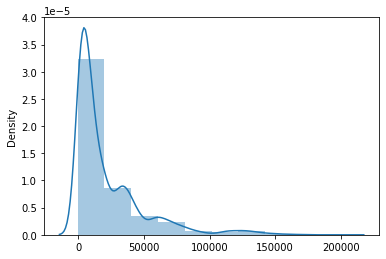

In [ ]:
import seaborn as sns
sns.distplot(df_train[target],bins=10);

Answer: it is NOT a normal distribution; it is SKEWED.  WHerease (describe) function gave us numerical values representing statistical calculations like mean, median %iles fo each of the categories, but did not show the non bell curve shape 

Notice that there exists nonpositive weekly sales. How many of rows are there that the weekly sales are negative or 0?

In [ ]:
from datetime import datetime 

In [ ]:
df.isnull().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       6587
MarkDown2       7229
MarkDown3       6656
MarkDown4       6587
MarkDown5       6587
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64

In [ ]:
df.isna().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       6587
MarkDown2       7229
MarkDown3       6656
MarkDown4       6587
MarkDown5       6587
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64

In [ ]:
(df_train[target] <= 0).sum() 
# Expected Output: 13

Weekly_Sales    15
dtype: int64

In [ ]:
df_missing = df.isna()
df_missing.head()

Store   Dept   Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0  False  False  False         False      False        False       False   
1  False  False  False         False      False        False       False   
2  False  False  False         False      False        False       False   
3  False  False  False         False      False        False       False   
4  False  False  False         False      False        False       False   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5    CPI  Unemployment  \
0       True       True       True       True       True  False         False   
1       True       True       True       True       True  False         False   
2       True       True       True       True       True  False         False   
3       True       True       True       True       True  False         False   
4       True       True       True       True       True  False         False   

    Type   Size   week  month   year  
0  False  False  False  False  False  
1  False  False  False  False  False  
2  False  False  False  False  False  
3  False  False  False  False  False  
4  False  False  False  False  False

In [ ]:
df_missing.dtypes

Store           bool
Dept            bool
Date            bool
Weekly_Sales    bool
IsHoliday       bool
Temperature     bool
Fuel_Price      bool
MarkDown1       bool
MarkDown2       bool
MarkDown3       bool
MarkDown4       bool
MarkDown5       bool
CPI             bool
Unemployment    bool
Type            bool
Size            bool
week            bool
month           bool
year            bool
dtype: object

In [ ]:
df_num_missing = df_missing.sum()
df_num_missing

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       6587
MarkDown2       7229
MarkDown3       6656
MarkDown4       6587
MarkDown5       6587
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64

In [ ]:
len(df)

10244

In [ ]:
df_num_missing / len(df)

Store          0.00
Dept           0.00
Date           0.00
Weekly_Sales   0.00
IsHoliday      0.00
Temperature    0.00
Fuel_Price     0.00
MarkDown1      0.64
MarkDown2      0.71
MarkDown3      0.65
MarkDown4      0.64
MarkDown5      0.64
CPI            0.00
Unemployment   0.00
Type           0.00
Size           0.00
week           0.00
month          0.00
year           0.00
dtype: float64

In [ ]:
df_missing.mean()

Store          0.00
Dept           0.00
Date           0.00
Weekly_Sales   0.00
IsHoliday      0.00
Temperature    0.00
Fuel_Price     0.00
MarkDown1      0.64
MarkDown2      0.71
MarkDown3      0.65
MarkDown4      0.64
MarkDown5      0.64
CPI            0.00
Unemployment   0.00
Type           0.00
Size           0.00
week           0.00
month          0.00
year           0.00
dtype: float64

In [ ]:
df.isna().mean().round(4) * 100

Store           0.00
Dept            0.00
Date            0.00
Weekly_Sales    0.00
IsHoliday       0.00
Temperature     0.00
Fuel_Price      0.00
MarkDown1      64.30
MarkDown2      70.57
MarkDown3      64.97
MarkDown4      64.30
MarkDown5      64.30
CPI             0.00
Unemployment    0.00
Type            0.00
Size            0.00
week            0.00
month           0.00
year            0.00
dtype: float64

In [ ]:
gt_60 = df['Weekly_Sales'] > 60
gt_60.head()

0    True
1    True
2    True
3    True
4    True
Name: Weekly_Sales, dtype: bool

In [ ]:
gt_60.sum()

10009

In [ ]:
gt_60.mean()

0.9770597422881687

What percentage is the negative and zero sales?

10,009 sales are zero or 97.7% 

---



In [ ]:
#percentage of negatives and zeros
percent_missing = df.isna().sum() / len(df)
print(percent_missing)


Store          0.00
Dept           0.00
Date           0.00
Weekly_Sales   0.00
IsHoliday      0.00
Temperature    0.00
Fuel_Price     0.00
MarkDown1      0.64
MarkDown2      0.71
MarkDown3      0.65
MarkDown4      0.64
MarkDown5      0.64
CPI            0.00
Unemployment   0.00
Type           0.00
Size           0.00
week           0.00
month          0.00
year           0.00
dtype: float64


<details>
<summary>Expected Output</summary>

`0.0015863331299572911` or `0.16%`
</details>

After communicating your findings, the stakeholders confirm that you can remove these data entries for now and they are launching an investigation by analysts and data engineers. 

Now remove them from the training dataset.

In [ ]:
df.isnull().head()

Store   Dept   Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0  False  False  False         False      False        False       False   
1  False  False  False         False      False        False       False   
2  False  False  False         False      False        False       False   
3  False  False  False         False      False        False       False   
4  False  False  False         False      False        False       False   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5    CPI  Unemployment  \
0       True       True       True       True       True  False         False   
1       True       True       True       True       True  False         False   
2       True       True       True       True       True  False         False   
3       True       True       True       True       True  False         False   
4       True       True       True       True       True  False         False   

    Type   Size   week  month   year  
0  False  False  False  False  False  
1  False  False  False  False  False  
2  False  False  False  False  False  
3  False  False  False  False  False  
4  False  False  False  False  False

In [ ]:
df[(df != 0).all(1)]

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
1          1     1 2010-02-12     46,039.49       True        38.51   
31         1     1 2010-09-10     18,194.74       True        78.69   
42         1     1 2010-11-26     18,820.29       True        64.52   
47         1     1 2010-12-31     19,124.58       True        48.43   
53         1     1 2011-02-11     37,887.17       True        36.39   
...      ...   ...        ...           ...        ...          ...   
10216      1    99 2011-09-09         40.00       True        76.00   
10217      1    99 2011-11-25      2,400.00       True        60.14   
10221      1    99 2011-12-30        400.00       True        44.55   
10223      1    99 2012-02-10      1,070.00       True        48.02   
10240      1    99 2012-09-07          0.05       True        83.96   

       Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
1            2.55        NaN        NaN        NaN        NaN        NaN   
31           2.56        NaN        NaN        NaN        NaN        NaN   
42           2.73        NaN        NaN        NaN        NaN        NaN   
47           2.94        NaN        NaN        NaN        NaN        NaN   
53           3.02        NaN        NaN        NaN        NaN        NaN   
...           ...        ...        ...        ...        ...        ...   
10216        3.55        NaN        NaN        NaN        NaN        NaN   
10217        3.24     410.31      98.00  55,805.51       8.00     554.92   
10221        3.13   5,762.10  46,011.38     260.36     983.65   4,735.78   
10223        3.41  13,925.06   6,927.23     101.64   8,471.88   6,886.04   
10240        3.73   5,204.68      35.74      50.94   4,120.32   2,737.17   

         CPI  Unemployment Type    Size  week  month  year  
1     211.24          8.11    A  151315     6      2  2010  
31    211.50          7.79    A  151315    36      9  2010  
42    211.75          7.84    A  151315    47     11  2010  
47    211.40          7.84    A  151315    52     12  2010  
53    212.94          7.74    A  151315     6      2  2011  
...      ...           ...  ...     ...   ...    ...   ...  
10216 215.86          7.96    A  151315    36      9  2011  
10217 218.47          7.87    A  151315    47     11  2011  
10221 219.54          7.87    A  151315    52     12  2011  
10223 220.27          7.35    A  151315     6      2  2012  
10240 222.44          6.91    A  151315    36      9  2012  

[723 rows x 19 columns]

In [ ]:
# Removing rows with null values in all columns
df.dropna(axis=0, how="all", inplace=True)
# Removing all rows with null values in all rows
df.dropna(axis=1, how="all", inplace=True)

**not sure if this is correct**

In [ ]:
#mask = df_train[target] > 0
#df_train = # YOUR CODE HERE
# Expected Output: (8182, 19)
df_train.shape 
 

(7683, 19)

In [ ]:
df.describe()
#just checking

Store      Dept  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
count 10,244.00 10,244.00     10,244.00    10,244.00   10,244.00   3,657.00   
mean       1.00     44.39     21,710.54        68.22        3.22   8,086.73   
std        0.00     29.87     27,748.95        14.20        0.43   6,542.42   
min        1.00      1.00       -863.00        35.40        2.51     410.31   
25%        1.00     20.00      3,465.62        57.79        2.76   4,039.39   
50%        1.00     38.00     10,289.38        69.64        3.29   6,154.14   
75%        1.00     72.00     31,452.96        80.48        3.59  10,121.97   
max        1.00     99.00    203,670.47        91.65        3.91  34,577.06   

       MarkDown2  MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  \
count   3,015.00   3,588.00   3,657.00   3,657.00 10,244.00     10,244.00   
mean    2,967.16   1,245.40   3,755.21   5,027.75    216.00          7.61   
std     7,911.85   7,867.46   5,950.68   3,267.92      4.34          0.38   
min         0.50       0.25       8.00     554.92    210.34          6.57   
25%        40.48       6.00     577.14   3,127.88    211.53          7.35   
50%       137.86      30.23   1,822.55   4,325.19    215.46          7.79   
75%     1,569.00     101.64   3,750.59   6,222.25    220.64          7.84   
max    46,011.38  55,805.51  32,403.87  20,475.32    223.44          8.11   

            Size      week     month      year  
count  10,244.00 10,244.00 10,244.00 10,244.00  
mean  151,315.00     25.84      6.45  2,010.96  
std         0.00     14.17      3.25      0.80  
min   151,315.00      1.00      1.00  2,010.00  
25%   151,315.00     14.00      4.00  2,010.00  
50%   151,315.00     26.00      6.00  2,011.00  
75%   151,315.00     38.00      9.00  2,012.00  
max   151,315.00     52.00     12.00  2,012.00

In [ ]:
# Remove negative values as sales cannot be negative values.
df= df[df['Weekly_Sales'] >= 0]
df.shape

(10229, 19)

Let's move on to features. 

Though almost all the come through as numerical, should they all be treated as numerical features? Let's inspect the number of unique values: 

In [ ]:
[(col, df[col].nunique())for col in df_train.columns]

[('Store', 1),
 ('Dept', 77),
 ('Date', 143),
 ('Weekly_Sales', 10029),
 ('IsHoliday', 2),
 ('Temperature', 143),
 ('Fuel_Price', 137),
 ('MarkDown1', 51),
 ('MarkDown2', 41),
 ('MarkDown3', 49),
 ('MarkDown4', 51),
 ('MarkDown5', 51),
 ('CPI', 143),
 ('Unemployment', 12),
 ('Type', 1),
 ('Size', 1),
 ('week', 52),
 ('month', 12),
 ('year', 3)]

`Temperature`, `CPI`, `Unemployment`, `Fuel_Price` are continuous. Those tie to the second business objective. Let us put these four into a list and store it in `external_factors`. From earlier, we noticed that `MarkDownx` columns contain some missing values, we will treat them in a later task. 

In [ ]:
external_factors = ['Temperature','CPI','Unemployment', 'Fuel_Price']

Visualize Temperature in a box plot, what do you think is the advantage of a box plot over a histogram? You can use `pd.DataFrame.boxplot()`, set the figure size as (6, 4), and turn off the grid.

❓ Question 5:

Visualize Temperature in a box plot, what do you think the advantage of a box plot over histogram? 

HINT: You can use `pd.DataFrame.boxplot()`, set the figure size as (6, 4), and turn off the grid.

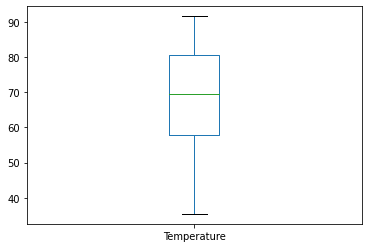

In [ ]:
#temperature in a box plot
boxplot = df.boxplot(figsize = (6,4), column =['Temperature'], grid = False)


boxplot on top of a histogram can help you in better understanding the distribution of the data and visualizing outliers as well as quartiles positions. 

Let's visualize all four numerical features in both density plot and box plot. Note any observations.

                                 Numeric Features Distribution                                  


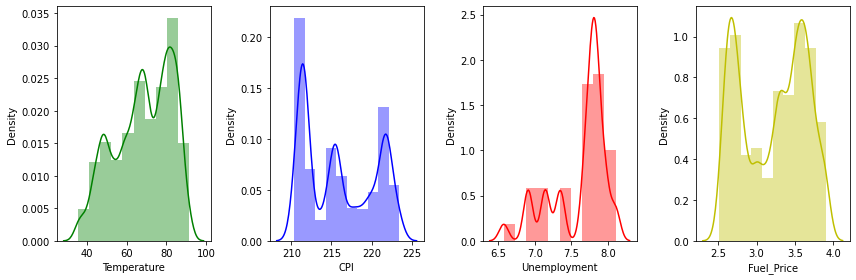

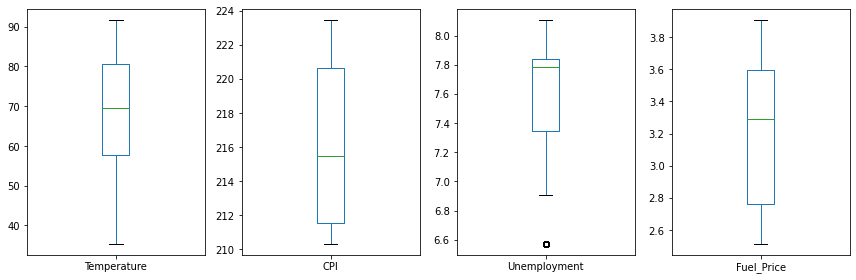

In [ ]:
import matplotlib.pyplot as plt
print('\033[1mNumeric Features Distribution'.center(100))

figsize = (12, 4)

n=len(external_factors)
colors = ['g', 'b', 'r', 'y', 'k']

# histogram
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.distplot(df_train[external_factors[i]],
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

# boxplot
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    df_train.boxplot(external_factors[i], grid=False)
plt.tight_layout();

OBSERVATIONS include that the graphs of Temperature and Fuel_Price and Unemployment are all skewed to the right; CPI is not skewed but has 3 peaks.
 in the boxplots, CPI has the lowest median, unemployment the highest, and temperature and fuel price medians are comparable

We will investigate the impacts of the external factors later. Now let's scan through the other features.

`Store`, `Type`, and `Size` each has only one unique value, offering no information, we can safely ignore them. 

We extracted `year`, `month`, and `week` from  `Date`, thus `Date` is redundant; but it is easy to find the date range in the training dataset using `Date`:

In [ ]:
# Expected Output: (Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))
df_train['Date'].min(), df_train['Date'].max() 

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

Our training data ranges from 5th of February 2010 to 26th of October 2012.

It makes more sense to treat `year`, `month`, `week` as categorical, more accurately ordinal; and the boolean feature `IsHoliday` can be considered as categorical, so can `Dept`. Let's put these column names into a list `categoricalFeatures`.

In [ ]:
categoricalFeatures = ['year','month','week','IsHoliday', 'Dept']

In [ ]:
# Creating the Series
sr = pd.Series.value_counts(['year','month','week','IsHoliday', 'Dept'])
  
# Print the series
print(sr)

year         1
month        1
week         1
IsHoliday    1
Dept         1
dtype: int64


For the categorical features, we are more interested in the frequency of each value, use `pd.Series.value_counts` to see how many rows where `IsHoliday` is true and false respectively ( Data imbalance is the norm ).

In [ ]:
# how many rows where IsHoliday true  
true_count = df.IsHoliday.sum()
print(true_count)
#false counts
false_count = (~df.IsHoliday).sum()
print(false_count)

fc, tc = df.IsHoliday.value_counts().sort_index().tolist()

723
9521


<details>
<summary>Expected Output</summary>

```
False    7586
True      596
Name: IsHoliday, dtype: int64
```
</details>

Visualize the distribution of `month`; use `sns.countplot()`.

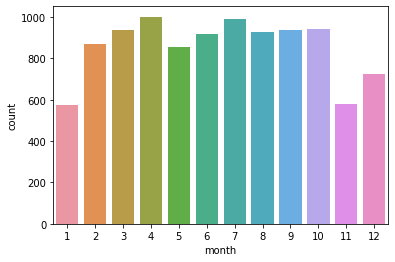

In [ ]:
#visualize month distribution

sns.countplot(x=df["month"])

                               Visualising Categorical Features:                                


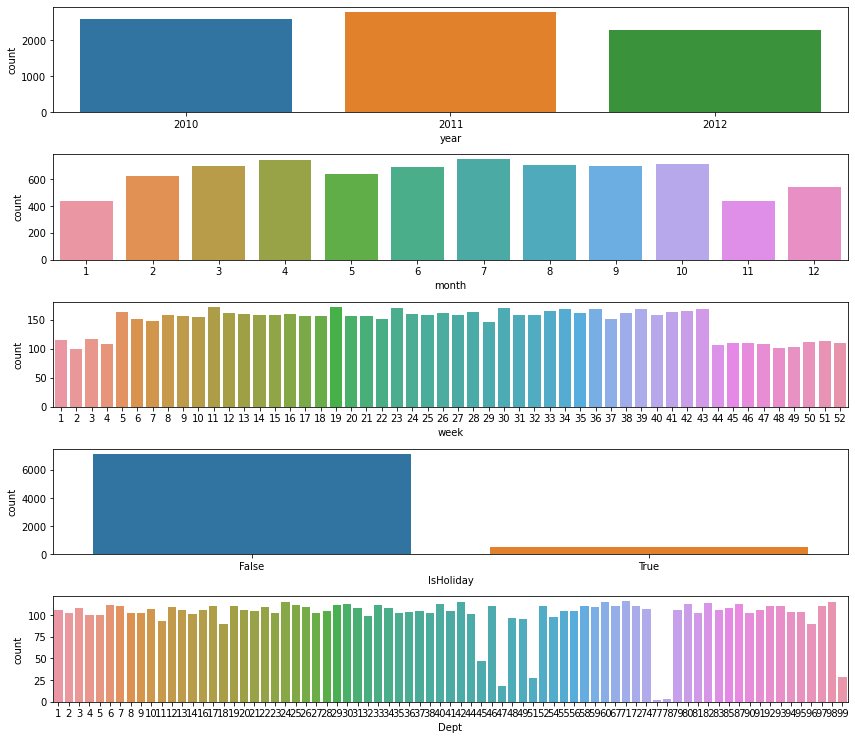

In [ ]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

plt.figure(figsize=(12,12))

for i in range(len(categoricalFeatures)):
    plt.subplot(6,1,i+1)
    sns.countplot(df_train[categoricalFeatures[i]])
plt.tight_layout();

❓ Question 6: 

Discuss with your pair programming partner: There is less data in 2012 than the previous two years, did the sale drop from previous years? Does it affect what we see in the plots for month and week? Does the plot below clarify it to some degree?

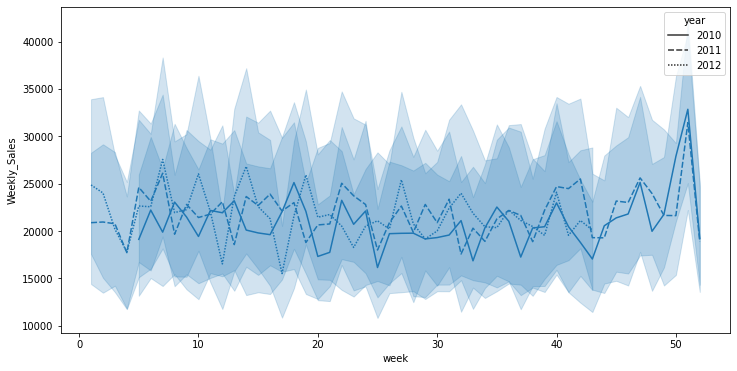

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_train, x="week", y="Weekly_Sales",  style='year');

yes, sales in 2012 dropped from 2011 and 2010.  this is evident in the histogram above.  Yes, this pattern is also evident in the week and month graphs.  yes, the plot below clarifies with specific highs and lows by week with all 3 years represented, so it is easier to get more detail from the plot below than from the histogram up

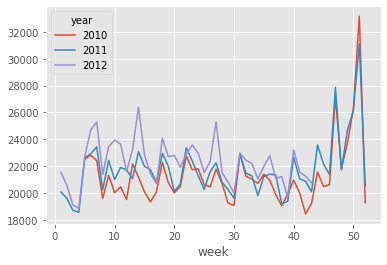

In [ ]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

## Task III: Impact from Holidays

The first business objective is to understand the impact of holidays on weekly sales. 

There is a flag provided for us: `IsHoliday`, let's calculate the average weekly sales for holiday weeks and non-holiday weeks, respectively. For this, we will use `.groupBy` and `.mean()`. Are holiday sales higher?

In [ ]:
# Yes holiday sales are higher, by 2,000 approximately
df.groupby('IsHoliday').mean()

Store  Dept  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
IsHoliday                                                                  
False       1.00 44.38     21,609.63        69.01        3.23   8,239.56   
True        1.00 44.54     23,039.39        57.94        3.09   6,325.54   

           MarkDown2  MarkDown3  MarkDown4  MarkDown5    CPI  Unemployment  \
IsHoliday                                                                    
False       1,862.55     110.61   3,786.38   5,140.49 216.03          7.60   
True       13,268.09  14,054.61   3,395.96   3,728.48 215.57          7.72   

                Size  week  month     year  
IsHoliday                                   
False     151,315.00 25.34   6.34 2,010.98  
True      151,315.00 32.39   7.90 2,010.80

<details>
<summary>Expected Output</summary>

```
IsHoliday
False   21,756.05
True    23,737.05
Name: Weekly_Sales, dtype: float64
```
</details>


But we would like to understand it at more granular level, remember [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson's_paradox)? To save some time,  date mapping are identified for the training data

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
- Thanksgiving: 26-Nov-10, 25-Nov-11
- Christmas: 31-Dec-10, 30-Dec-11

We create a flag for each holiday to help you analyze weekly sale by each holiday type

In [ ]:
superbowl_mask = df_train['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10'])
laborday_mask = df_train['Date'].isin(['2010-09-10', '2011-09-09','2012-09-07'])
thanksgiving_mask = df_train['Date'].isin(['2010-11-26', '2011-11-25'])
christmas_mask = df_train['Date'].isin(['2010-12-31', '2011-12-30'])

In [ ]:
df_train['superbowl'] = superbowl_mask
df_train['laborday'] = laborday_mask
df_train['thanksgiving'] =thanksgiving_mask
df_train['christmas'] = christmas_mask

Run the next cell to see 1) how many weekly sales fell on Christmas (does it make sense? what did we not account for?) 2) what is the average weekly sales stratified by whether it is Christmas week or not?

Weekly sales on christmas is only 111 which cannot be correct, we didnt account for store or department and maybe also closed days for holiday? also does the normal sales per week have gaussian distribution normally? also what about the range in weekly sales?

In [ ]:
df_train.groupby(['christmas'])\
        .agg(count = ('christmas', 'size'), 
             avg_weekly_sales= ('Weekly_Sales','mean'))

count  avg_weekly_sales
christmas                         
False       7572         21,566.36
True         111         19,035.94

Perform the same for the other three holidays:

In [ ]:
holidays = ['superbowl', 'laborday', 'thanksgiving', 'christmas']
for holiday in holidays:
    summary_stats = df_train.groupby([holiday])\
       .agg(count = ('christmas', 'size'), 
             avg_weekly_sales= ('Weekly_Sales','mean'))
    print(summary_stats)
    print()

           count  avg_weekly_sales
superbowl                         
False       7531         21,507.08
True         152         22,655.86

          count  avg_weekly_sales
laborday                         
False      7514         21,524.59
True        169         21,761.70

              count  avg_weekly_sales
thanksgiving                         
False          7575         21,475.34
True            108         25,349.63

           count  avg_weekly_sales
christmas                         
False       7572         21,566.36
True         111         19,035.94



<details>
<summary>Expected Output</summary>

```
           count  avg_weekly_sales
superbowl                         
False       8001         21,845.80
True         181         24,311.98

          count  avg_weekly_sales
laborday                         
False      8007         21,884.35
True        175         22,632.78

              count  avg_weekly_sales
thanksgiving                         
False          8067         21,813.97
True            115         27,959.84

           count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56
```
</details>


Without hypothesis testing and by only eyeballing, it seems like Super Bowl and Thanksgiving has a positive impact on the weekly sales for Store 1 in this training dataset. 
Discuss with your teammate, are you surprised that during Christmas, sales at Walmart do not go up? Holiday effect, if causal, happened most during Thanksgiving weeks, is this something you expected?

Yes, we are surprised that the sales were not up during Christmas, maybe because people like to avoid the holiday rush so they start earlier during Thanksgiving holiday and they also have time to go shopping?

We have been ignoring `Dept`, let's take a look at the plot below showing the weekly sales by department in 2011. 

7448     True
7947    False
6452     True
3769     True
3406    False
        ...  
6689    False
8898    False
6528    False
7377    False
92       True
Name: year, Length: 7683, dtype: bool

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Weekly Sales by Department')

Text(0.5, 0, 'Departments')

Text(0, 0.5, 'Weekly Sales')

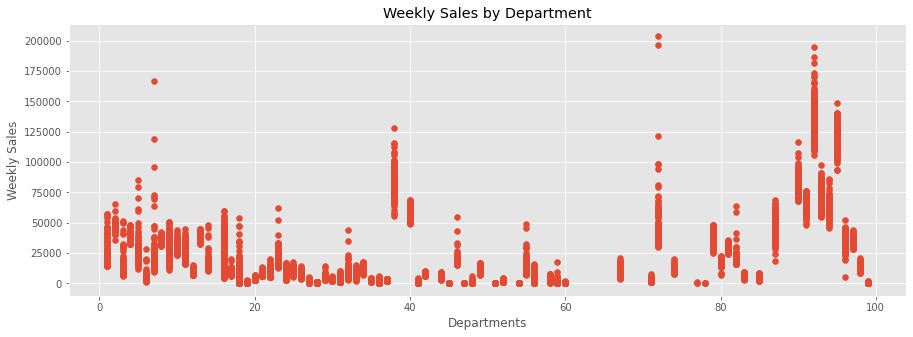

In [ ]:
#Plot of Weekly Sales and Department.
df_train.year==2011
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

In [ ]:
#plt.figure(figsize=(10,4))
#sns.scatterplot(data=df_train[df_train.year==2011], x = 'Dept', y= target, hue='IsHoliday');

Dept 72 has a very unusual high weekly sales during the holiday week, but we will need more data to understand if this is data issue, outlier, or special event. 

## Task IV: Visualize Relationship between Macroeconomic & External Factors and Sales

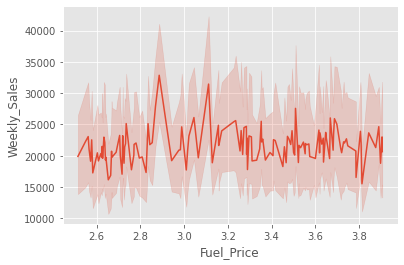

In [ ]:
sns.lineplot(data=df_train, x="Fuel_Price", y="Weekly_Sales");

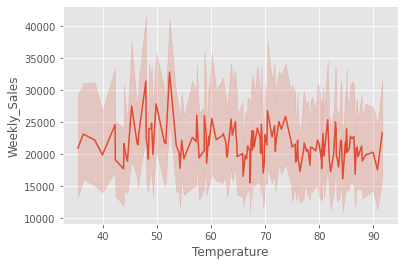

In [ ]:
sns.lineplot(data=df_train, x="Temperature", y="Weekly_Sales");

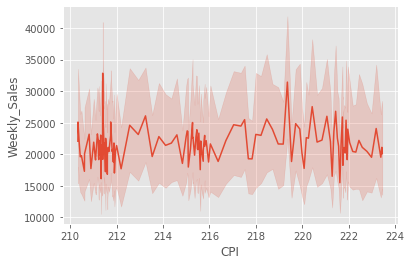

In [ ]:
sns.lineplot(data=df_train, x="CPI", y="Weekly_Sales");

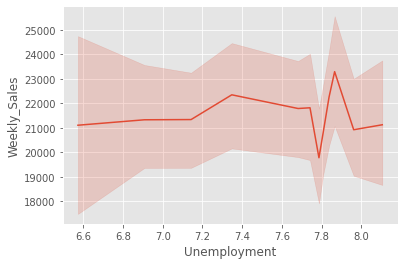

In [ ]:
sns.lineplot(data=df_train, x="Unemployment", y="Weekly_Sales");

By eyeballing, do you find strong evidence that those are correlated with Walmart's weekly sales? Do you think `lineplot` is an appropriate plot for this?

Yes, the patterns all seem to match weekly sales, although not by exact value but by shape of the trend.  Lineplot is appropriate because it shows the values at the peaks and troughs and in between

Lastly, we calculate the spearman correlations among target and external factors and verify that there is no strong linear correlation between the target variable and these features.

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Features Correlated to Saales')

[]

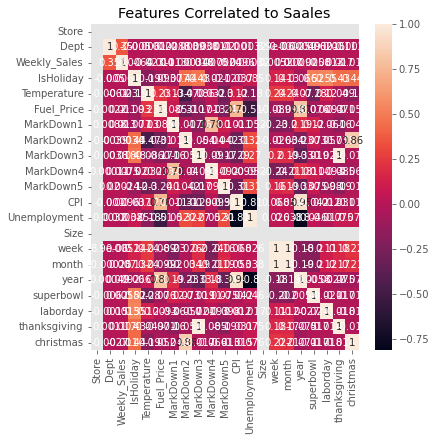

In [ ]:
# Plotting correlation between all important features
corr = df_train.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True)
plt.title('Features Correlated to Saales')
plt.plot()
#heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':12}, pad=16);

In [ ]:
#plt.figure(figsize=(6, 6))
#df_train_reduced = df_train[[target] + external_factors]

#corr = df_train_reduced.corr(method='spearman')
#heatmap = sns.heatmap(corr.sort_values(by=target, ascending=False),
#                      vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='BrBG')
#heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':12}, pad=16);

TypeError: ignored

<Figure size 432x432 with 0 Axes>

## Task V: Feature Engineering

"*Feature Engineering encapsulates various data engineering techniques such as selecting relevant features, handling missing data, encoding the data, and normalizing it. It is one of the most crucial tasks and plays a major role in determining the outcome of a model.*" [Ref](https://www.analyticsvidhya.com/blog/2021/10/a-beginners-guide-to-feature-engineering-everything-you-need-to-know/).

One part of feature engineering is to create new features from given data, like `thanksgiving` column earlier was derived from `Date`. Common techniques for tabular data include to add summary statistics of the numerical features such as mean and standard deviation, to create new features from the interaction of multiple features, etc. In this task, however, we will work on handling missing data, normalizing numerical features, and encoding categorical features. 

First, missing data. Missing value treatment is crucial, yet not trivial. Take a read on [Tackling Missing Value in Dataset](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/) for detailed explanation. Features with nulls or wrong values (e.g., negative fuel price) needs to be imputed or removed. 

- Do you want to keep the features with missing value? Discuss the trade offs
- If answer to the first question is yes, then how do you want to impute them? Discuss the trade offs

From ealier steps, we observed that only the markdown columns contain missing values, yet we do not have more information on what those values are for.  

In [ ]:
df_train.columns[df_train.isna().sum() != 0]

Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')

In [ ]:
df_train.isna().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       4961
MarkDown2       5450
MarkDown3       5011
MarkDown4       4961
MarkDown5       4961
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
superbowl          0
laborday           0
thanksgiving       0
christmas          0
dtype: int64

For each column, find out the percentage of the data is missing

In [ ]:
md_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in ['MarkDown'+str(i) for i in range(1,6)]:
    percent_missing =  df.isna().sum() / len(df) *100
    print(percent_missing)
    

  
 


Store           0.00
Dept            0.00
Date            0.00
Weekly_Sales    0.00
IsHoliday       0.00
Temperature     0.00
Fuel_Price      0.00
MarkDown1      64.32
MarkDown2      70.58
MarkDown3      64.99
MarkDown4      64.32
MarkDown5      64.32
CPI             0.00
Unemployment    0.00
Type            0.00
Size            0.00
week            0.00
month           0.00
year            0.00
dtype: float64
Store           0.00
Dept            0.00
Date            0.00
Weekly_Sales    0.00
IsHoliday       0.00
Temperature     0.00
Fuel_Price      0.00
MarkDown1      64.32
MarkDown2      70.58
MarkDown3      64.99
MarkDown4      64.32
MarkDown5      64.32
CPI             0.00
Unemployment    0.00
Type            0.00
Size            0.00
week            0.00
month           0.00
year            0.00
dtype: float64
Store           0.00
Dept            0.00
Date            0.00
Weekly_Sales    0.00
IsHoliday       0.00
Temperature     0.00
Fuel_Price      0.00
MarkDown1      64.32
Mark

In [ ]:
perc_missing =  df_train[col].isna().sum()/len(df_train)

<details>
<summary>Expected Output</summary>

```
MarkDown1: 64% is missing
MarkDown2: 70% is missing
MarkDown3: 65% is missing
MarkDown4: 64% is missing
MarkDown5: 64% is missing
```
</details>


The majority of the markdown fields are missing. This is where, again, we need to communicate with the stakeholders to understand what the data measure, how the data was collected and then determine our strategy from there. Since we want to understand the impacts of `MarkDownx` on weekly sales, we will keep the features and impute the missing values.  We have learned that there are tradeoffs with how we treat missing values and that our choice of imputation can be significantly impacted by extreme values and the amount of the missing data.  We choose to impute with the median here to mitigate these negative impacts. Use `.fillna()` to impute the missing values.

In [ ]:
	
df.fillna(df.median())
# this works for smaller dataset

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0          1     1 2010-02-05     24,924.50      False        42.31   
1          1     1 2010-02-12     46,039.49       True        38.51   
2          1     1 2010-02-19     41,595.55      False        39.93   
3          1     1 2010-02-26     19,403.54      False        46.63   
4          1     1 2010-03-05     21,827.90      False        46.50   
...      ...   ...        ...           ...        ...          ...   
10239      1    99 2012-08-31         20.06      False        80.49   
10240      1    99 2012-09-07          0.05       True        83.96   
10241      1    99 2012-09-14          0.03      False        74.97   
10242      1    99 2012-10-05        635.00      False        68.55   
10243      1    99 2012-10-12         80.00      False        62.99   

       Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.57   6,154.14     137.86      30.23   1,822.55   4,325.19   
1            2.55   6,154.14     137.86      30.23   1,822.55   4,325.19   
2            2.51   6,154.14     137.86      30.23   1,822.55   4,325.19   
3            2.56   6,154.14     137.86      30.23   1,822.55   4,325.19   
4            2.62   6,154.14     137.86      30.23   1,822.55   4,325.19   
...           ...        ...        ...        ...        ...        ...   
10239        3.64  21,442.73     102.32      21.70  13,209.64   3,032.96   
10240        3.73   5,204.68      35.74      50.94   4,120.32   2,737.17   
10241        3.72  17,212.52       7.00      18.79   1,523.11   7,992.72   
10242        3.62   8,077.89     137.86      18.22   3,617.43   3,626.14   
10243        3.60   2,086.18     137.86       8.11     602.36   5,926.45   

         CPI  Unemployment Type    Size  week  month  year  
0     211.10          8.11    A  151315     5      2  2010  
1     211.24          8.11    A  151315     6      2  2010  
2     211.29          8.11    A  151315     7      2  2010  
3     211.32          8.11    A  151315     8      2  2010  
4     211.35          8.11    A  151315     9      3  2010  
...      ...           ...  ...     ...   ...    ...   ...  
10239 222.31          6.91    A  151315    35      8  2012  
10240 222.44          6.91    A  151315    36      9  2012  
10241 222.58          6.91    A  151315    37      9  2012  
10242 223.18          6.57    A  151315    40     10  2012  
10243 223.38          6.57    A  151315    41     10  2012  

[10229 rows x 19 columns]

In [ ]:
(df_train.isna().sum() != 0).sum() # sanity check: 0

5

Visualize the distributions for those markdown fields after imputations, are they normal?

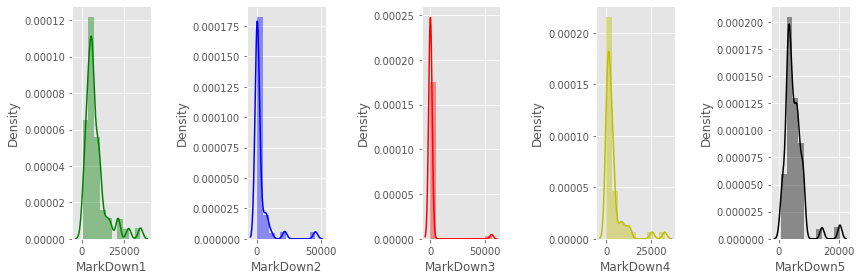

In [ ]:
plt.figure(figsize=figsize)
for i in range(len(md_cols)):
    plt.subplot(1,len(md_cols),i+1)
    sns.distplot(df_train[md_cols[i]],
                 hist_kws=dict(linewidth=2),
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

Note that missing values are different from outliers. Outliers, on the other hand, are feature values that are rare in nature. They can unncessarily skew the data and causes problem for modeling. Outlier treatment involves removing or imputing such values. One popular approach to identify outliers is IQR; that is, data points that lie 1.5 times of IQR above Q3 (third quartile) and below Q1 (first quartile) are outliers. Take a read on [Detecting and Treating Outliers](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/). We will leave it as an optional exercise for you to identify outliers using IQR, and replace the outliers with the median.

Now let's see how we normalize the data. For numerical features it means scaling the features to be of similar range. This step is crucial for machine learning algorithms that calculate distances between data (e.g., read [The Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). 

For this task, of the external features, let's keep Temperature since it is the most linearly correlated with the target variable, though very weak and negative ( feature selection ). In addition, we include one markdown field. Since neither seems to follow normal distributions, it is safer to use `MinMaxScaler` from `sklearn.preprocessing` to transform features by scaling each feature to a given range (See discussion on [Normalization vs Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numericalFeatures = ['Temperature', 'MarkDown1']
df_train_num = df_train[numericalFeatures]

In [ ]:
df_train_num.describe() 
# Check the summary statistics

Temperature  MarkDown1
count     7,683.00   2,722.00
mean         68.31   7,978.99
std          14.18   6,523.77
min          35.40     410.31
25%          57.79   4,039.39
50%          69.64   6,154.14
75%          80.49   9,873.33
max          91.65  34,577.06

Instantiate a MinMaxScaler and fit using `df_train_num`:

In [ ]:
#scaler = 
scaler = MinMaxScaler()
print(scaler.fit(df_train_num))

MinMaxScaler()


Now transform training data `df_train_num` and store the resulting nparray in `train_norm`:

In [ ]:
train_norm = scaler.transform(df_train_num) 

Verify that both columns now have minimum 0 and maximum 1. 

In [ ]:
pd.DataFrame(train_norm, columns=df_train_num.columns).describe()

Temperature  MarkDown1
count     7,683.00   2,722.00
mean          0.59       0.22
std           0.25       0.19
min           0.00       0.00
25%           0.40       0.11
50%           0.61       0.17
75%           0.80       0.28
max           1.00       1.00

In [ ]:
# Expected Output: Temperature - min = 0.00 and max = 1.00;  MarkDown1 - min = 0.00 and max = 1.00

Let's turn to categorical fatures. So far most, if not all Python packages for modeling do not accept strings as input; thus encoding the categorical value to numerical value is a necessary step. Here, let's apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) on `Dept` and `IsHoliday`:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categoricalFeatures = ['Dept', 'IsHoliday']
df_train_cat = df_train[categoricalFeatures]
ohe = OneHotEncoder(handle_unknown='ignore',sparse = False).fit(df_train_cat)

Transform the categorical features using one hote encoding `ohe`. 

In [ ]:
print(ohe)

OneHotEncoder(handle_unknown='ignore', sparse=False)


In [ ]:
train_ohe = df_train[categoricalFeatures]

In [ ]:
train_ohe.shape, df_train_cat.shape # Expected Output: ((8182, 79), (8182, 2))

((7683, 2), (7683, 2))

The number of columns explodes from 2 to 79. 

Lastly we merge the processed numerical features with the processed categorical features using `hstack` in `numpy`:

In [ ]:
import numpy as np
X_train = np.hstack([train_norm, train_ohe])

In [ ]:
X_train.shape # sanity check: (8182, 81)

(7683, 4)

What about the test data? Yes you need to apply the same treatments. We spare some copy + paste + edit and see how this can be done when we introduce `pipeline` next. 

## Task VI: Pipeline

Even with less than 20 features in our dataset, there are many many possibilities that you can preprocessing the data. There is no one-fits-all approach; often you will find yourself experimenting with many combinations to achieve better modelling performance: Should I apply normalization or standardization? Do I remove the outliers or should I impute them? Do I impute the missing values with median or mean or 0? Answers to many of these questions is "It depends." (Have you heard [Graduate Student Descent](https://sciencedryad.wordpress.com/2014/01/25/grad-student-descent/)?) That means trial-and-error and it is not efficient to produce a notebook each time when you need to try something slightly different. You will get lost quickly. Pipeline is one useful tool. 

Not only does Pipeline help streamline the process, keep the code modular, but also reduces the possibility of introducing errors/bugs. In this task, we build the pipeline following the strategies used in the last task, run a simple linear regression model, and print out the model's performance. Note there is minimal code required for you to implement, the key is to understand each step.

To avoid confusion, let's read the data again directly from `train-store1.csv`.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Timecapp/MLE-10/main/assignments/week-04-data-eng-airflow/dat/train-store1.csv?token=GHSAT0AAAAAAB2YJ7QE6TZLQFTTHRT3MVT2Y3OZMWQ')

In [ ]:
df.shape

(10244, 16)

Separating the target `y` from the features `X`:

In [ ]:
X, y = df.drop(columns=target), df[target]

Import `Pipeline` from submodule `sklearn.pipeline`

In [ ]:
from sklearn.pipeline import Pipeline

Now we build a transformer for numerical features following two steps: impute the missing values with the feature median (use `SimpleImputer`), followed by normalization (use `MinMaxScaler`)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
numeric_features = ['CPI', 'MarkDown1']
scaler = MinMaxScaler()
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
 
])

 
#scaler.fit_transform(X.f3.values.reshape(0, 1))
 
# transform data
#scaled = scaler.fit_transform(df)
 

For categorical features, we apply one hot encoding `OneHotEncoder` ( there are many other options; see [Scikit-learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) ):

In [ ]:
categorical_features = ['Dept', 'IsHoliday']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Piece the `numeric_transformer` and `categorical_transformer` using `ColumnTransformer`:

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Lastly, let's append the regression model to preprocessing pipeline to complete a full prediction pipeline.

In [ ]:
from sklearn.linear_model import LinearRegression

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

The pipepline has been built! The rest is to 
- split the data into training and testing sets
- apply the pipeline to the training data
- obtain the prediction performance on testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's run the prediction!

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['CPI', 'MarkDown1']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Dept', 'IsHoliday'])])),
                ('model', LinearRegression())])

In [ ]:
print("model score: %.3f" % model.score(X_test, y_test))

model score: 0.949


Optional: Discuss what type of [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) strategy you would use to select the features.

Feature selection strategy best suited to select the features is univariate feature selection and using SelectFromModel because features are considered unimportant and removed if the corresponding importance of the feature values are below the provided threshold parameter.

## Automating EDA

In this exercise, you have learned the manual way to perform EDA.  Doing EDA manually has the benefits of customization, but is also highly repetitive.  For this reason, a lot of EDA can easily be automated!  In automating our EDA, we can get to know our data more quickly and spend more time on feature engineering and modeling.  Let's check out a library called [SweetViz](https://github.com/fbdesignpro/sweetviz) to see how we can automate EDA! 

In [ ]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 6.5 MB/s 


In [ ]:
# importing sweetviz
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


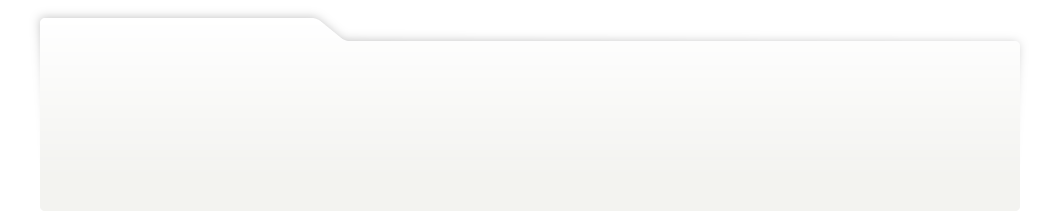
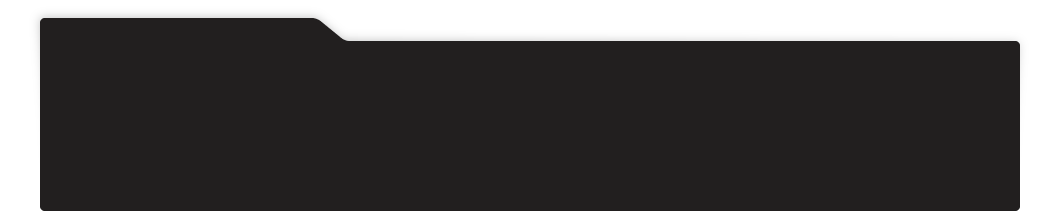
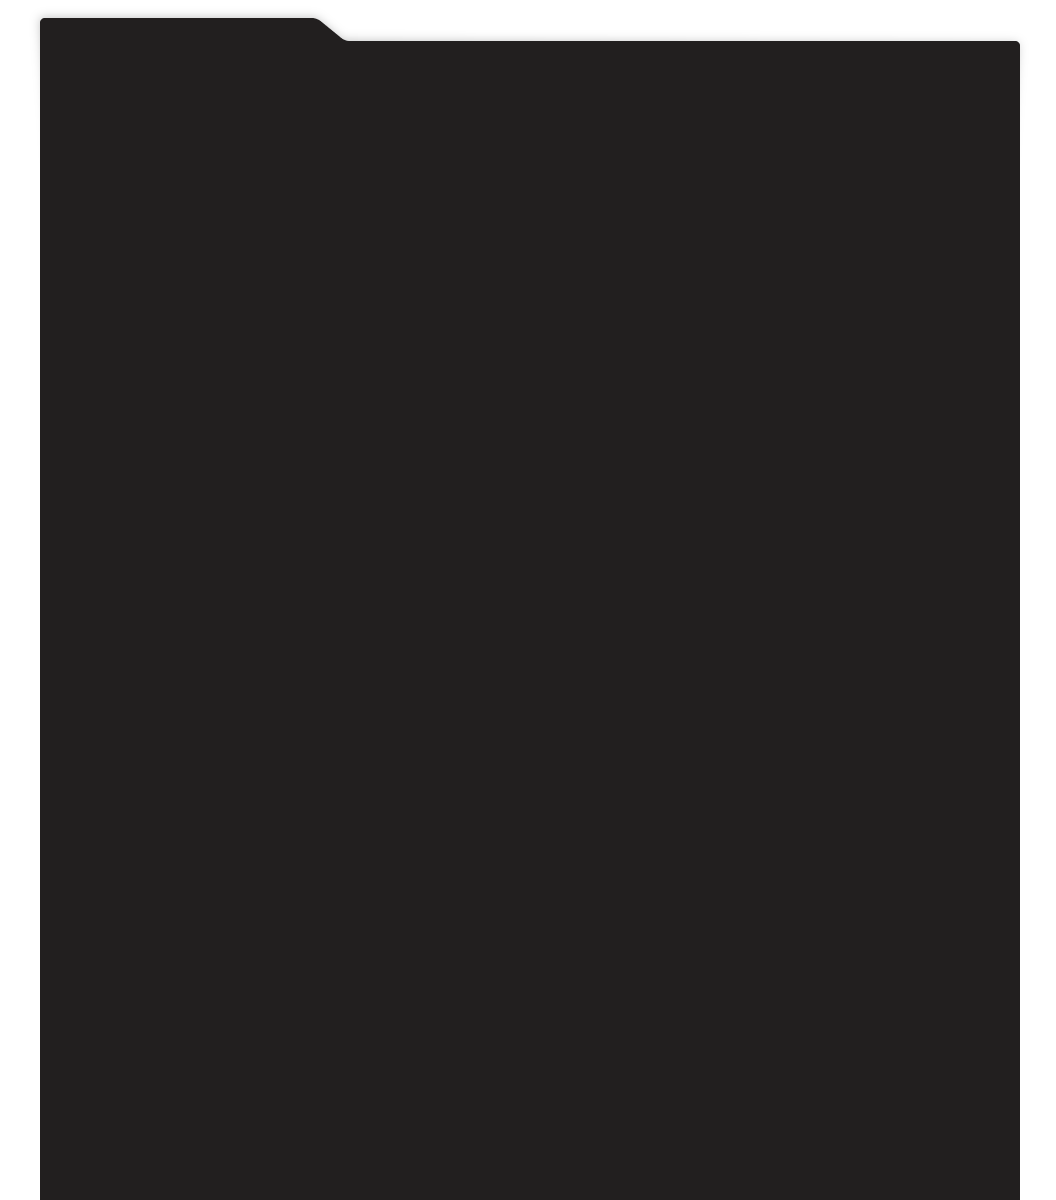
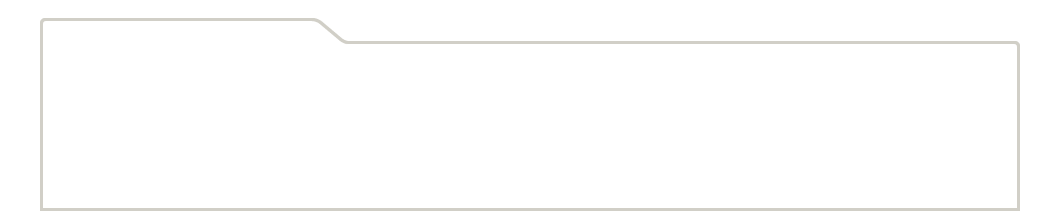
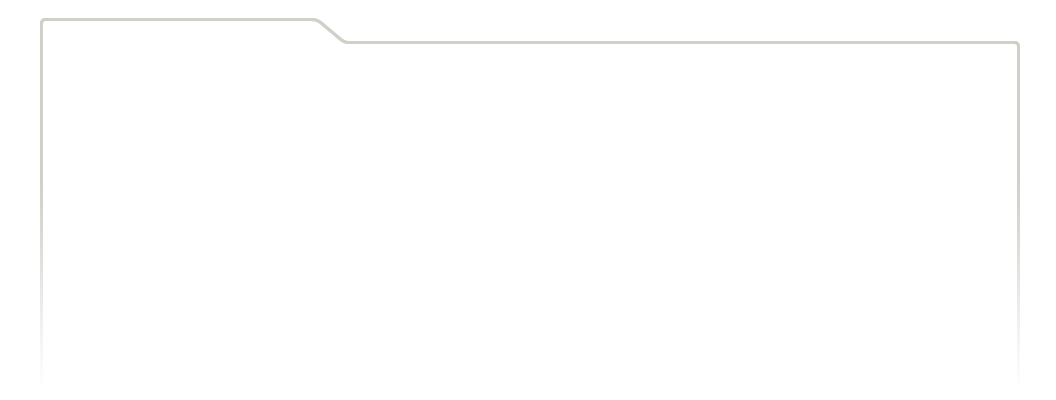
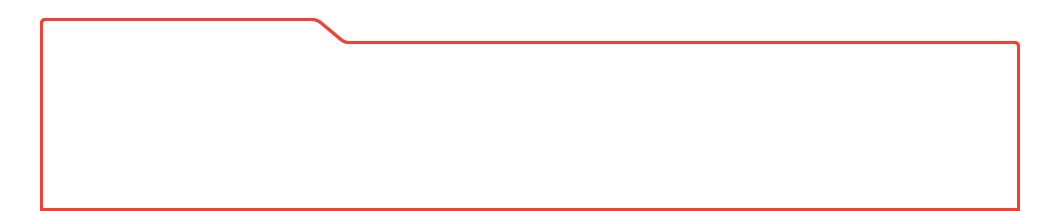
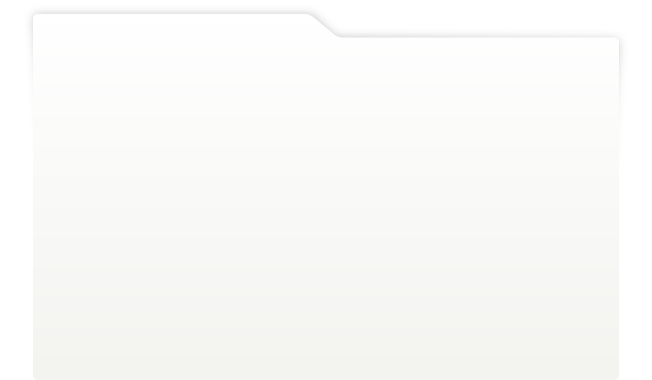
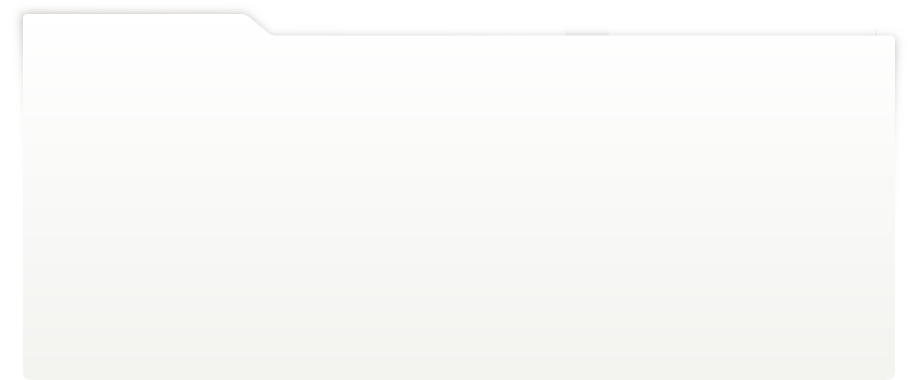
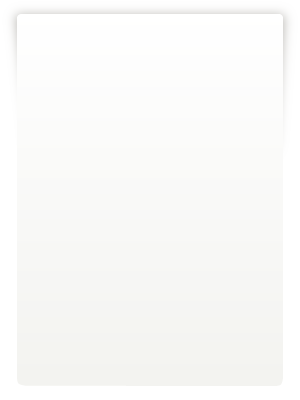
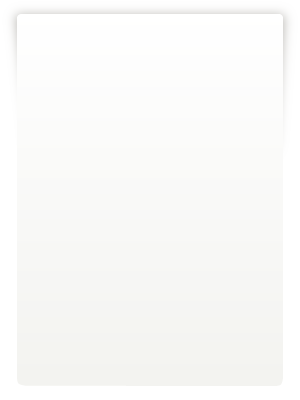
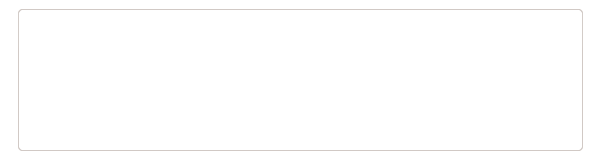
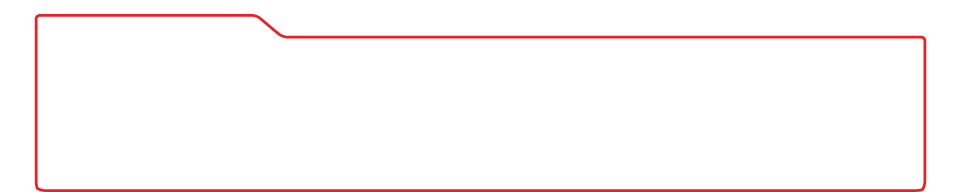
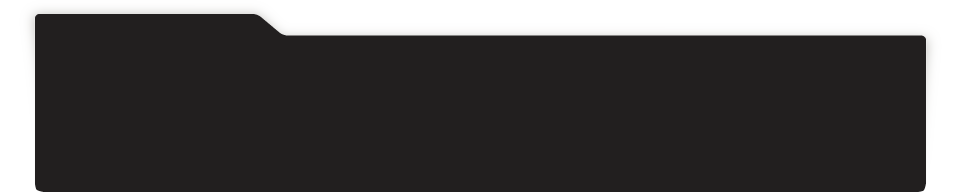
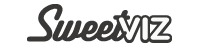
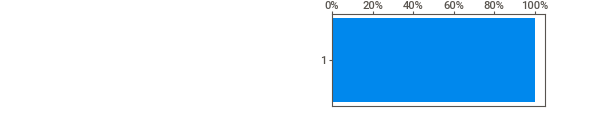
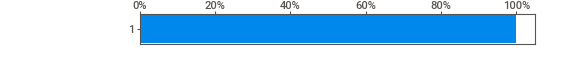
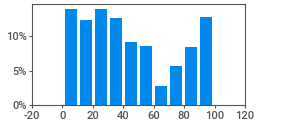
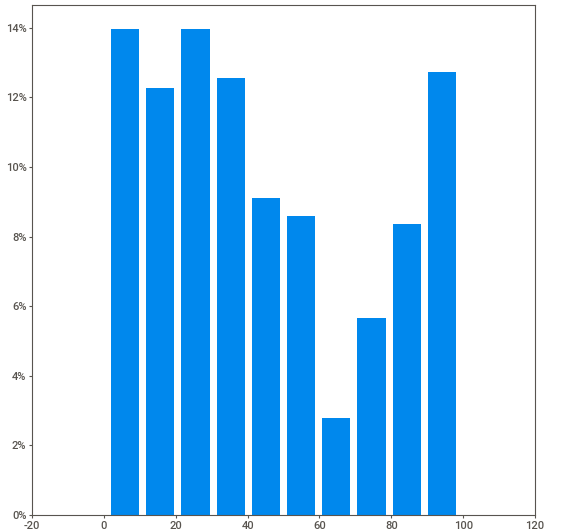
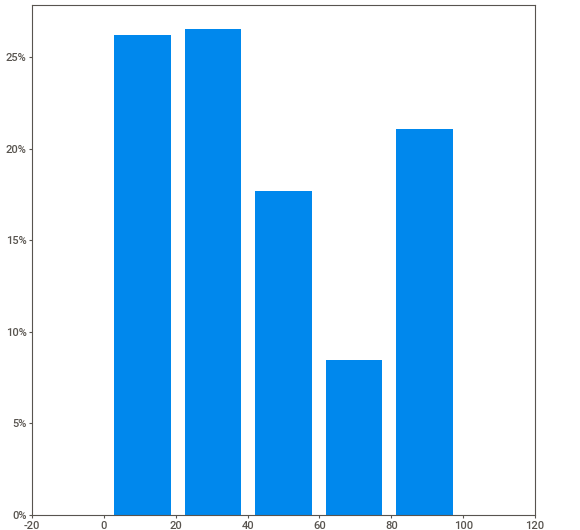
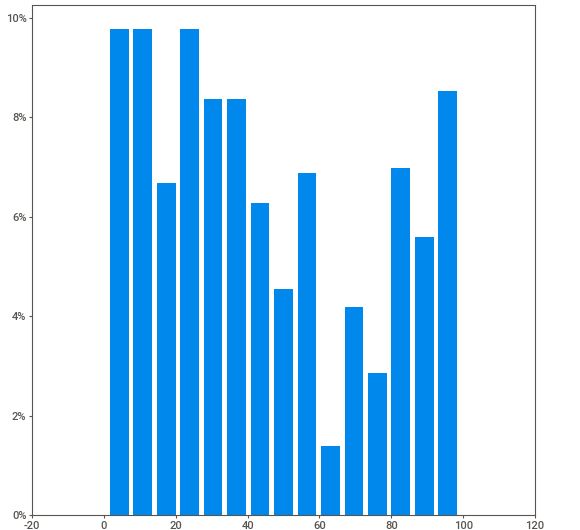
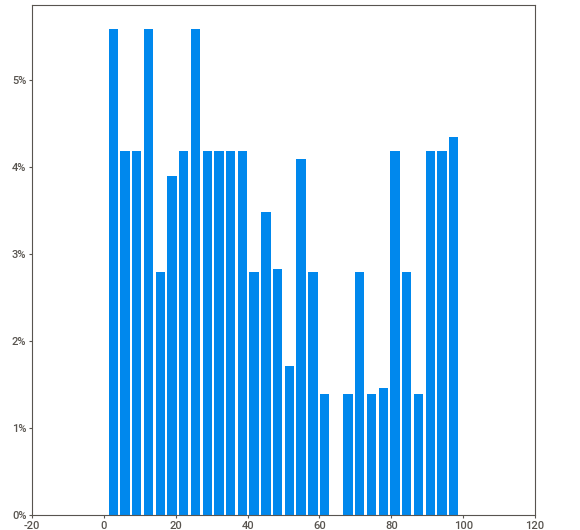
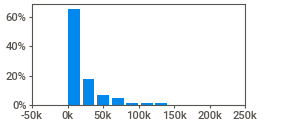
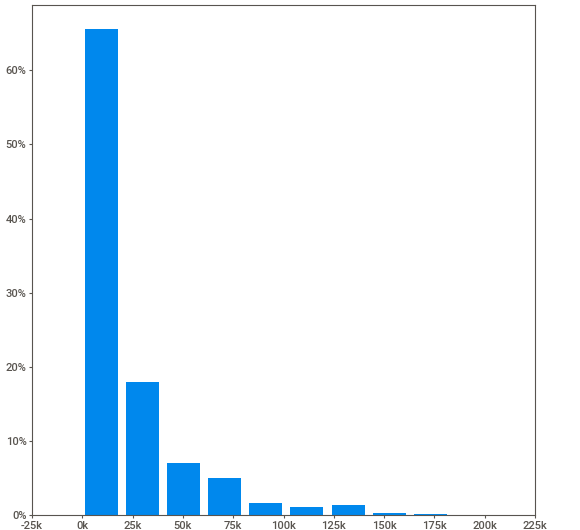
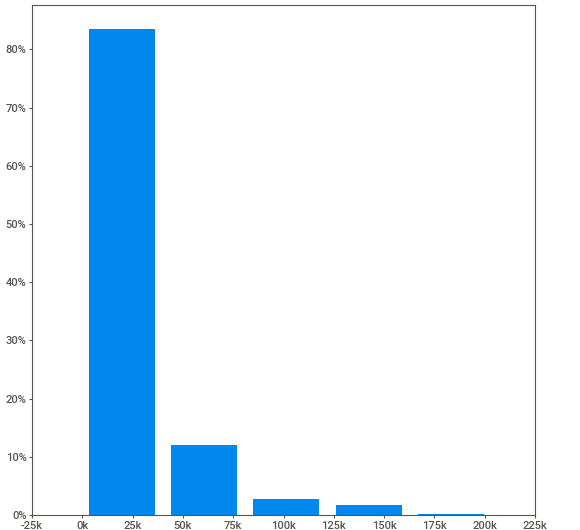
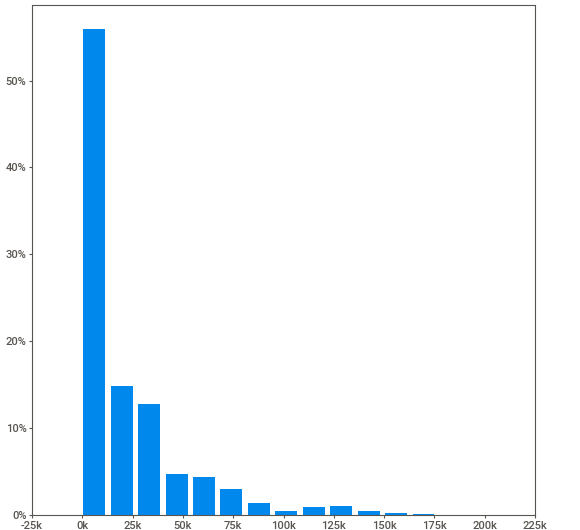
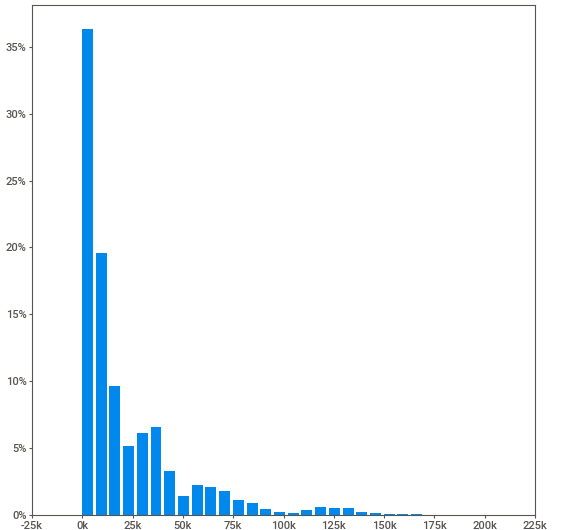
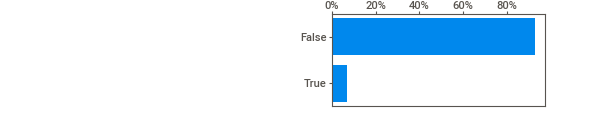
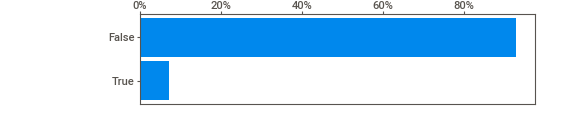
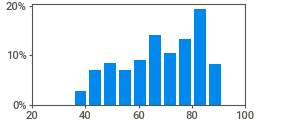
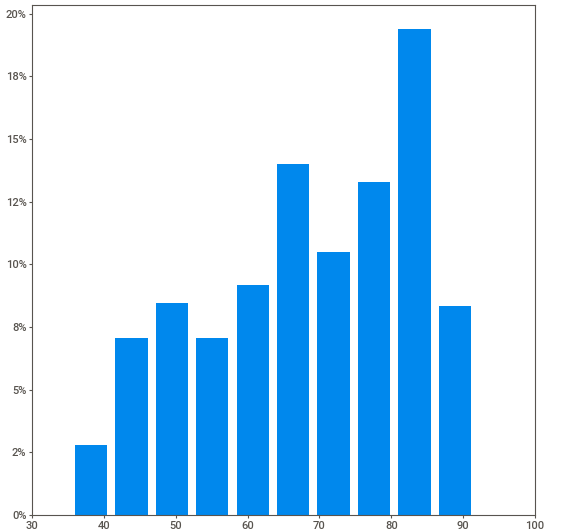
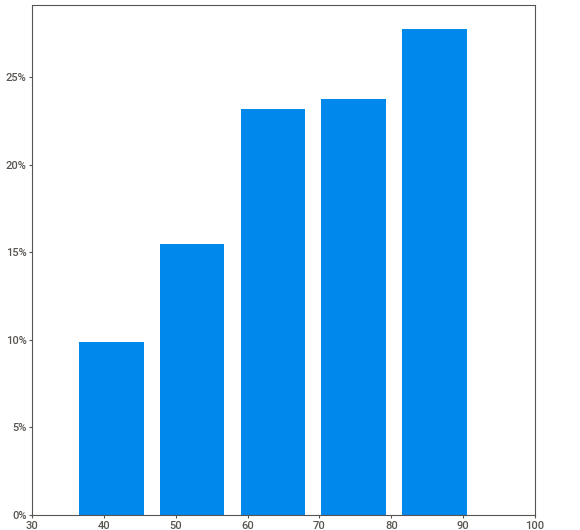
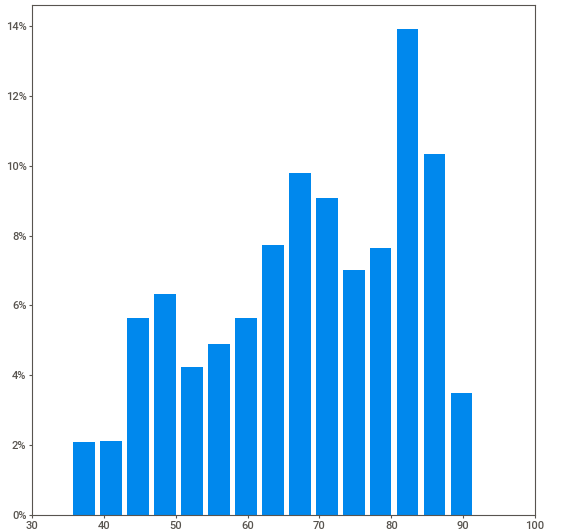
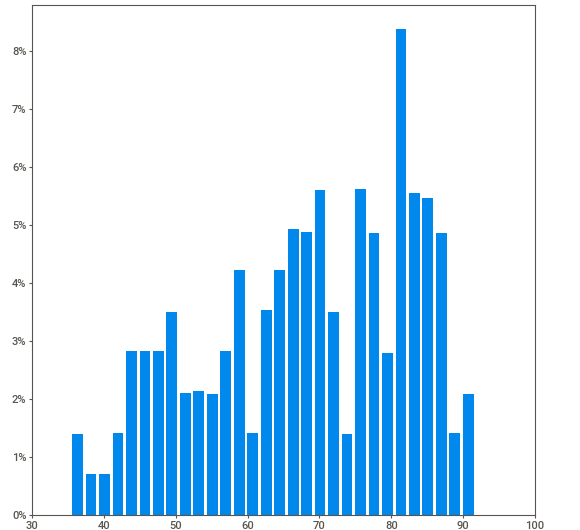
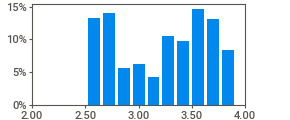
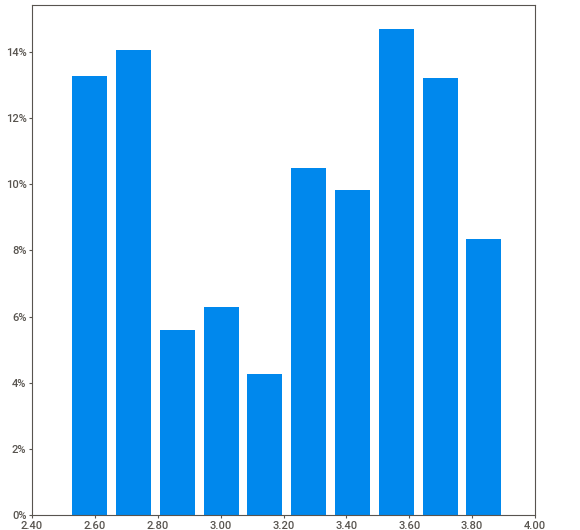
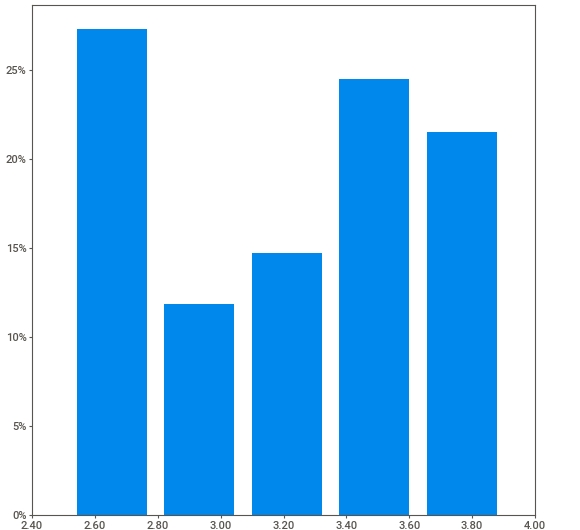
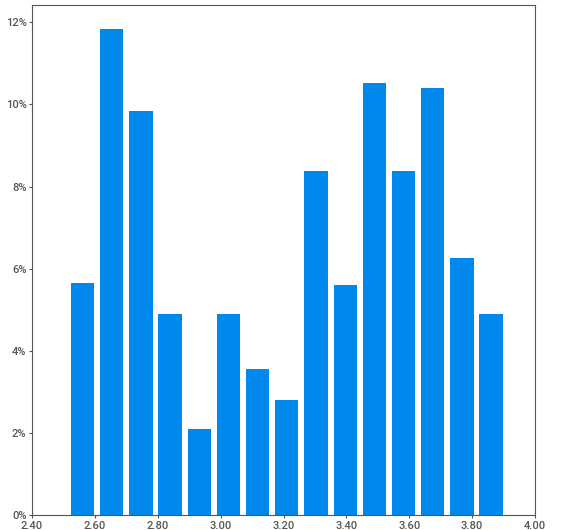
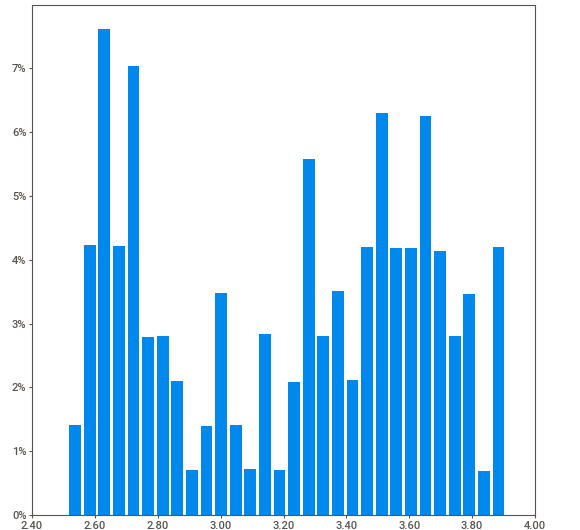
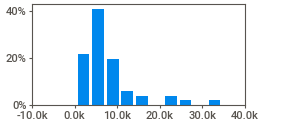
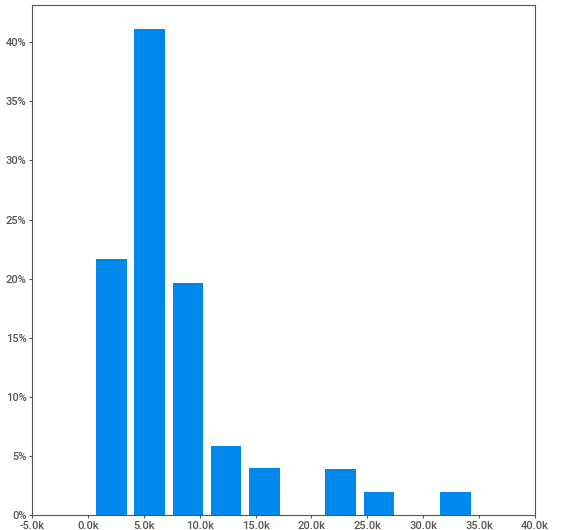
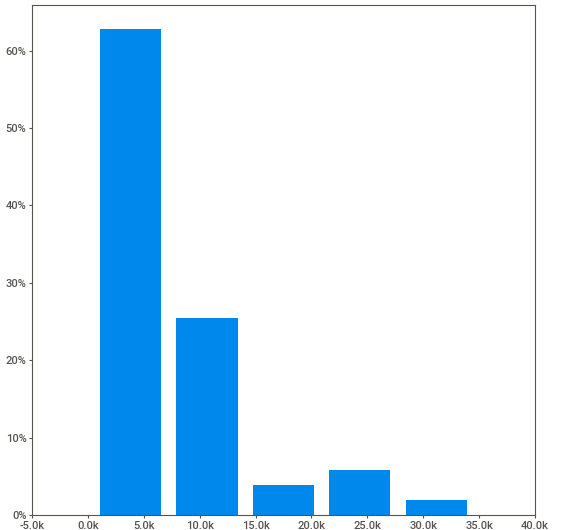
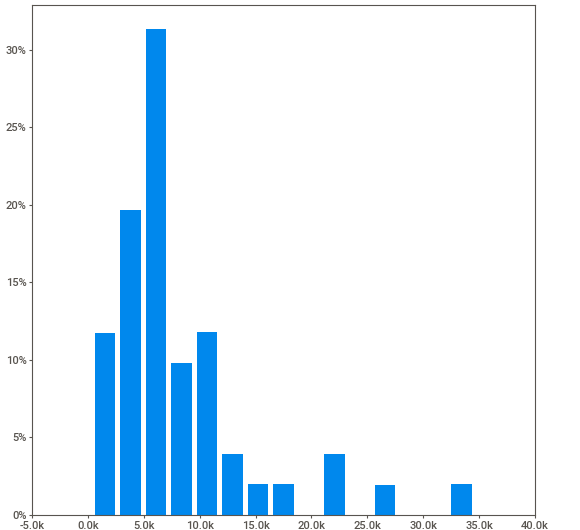
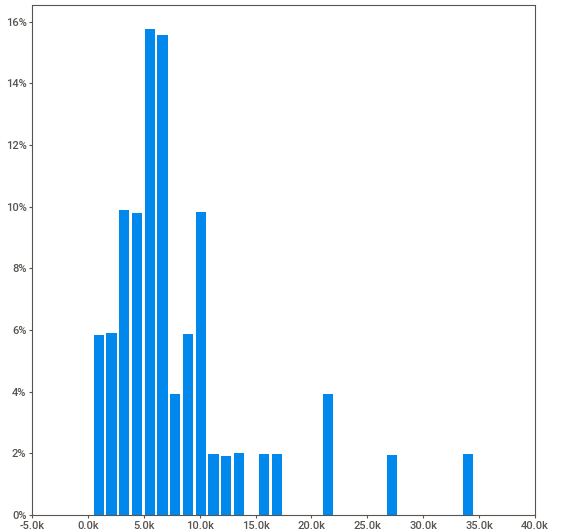
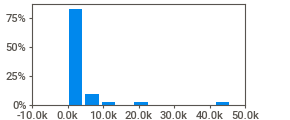
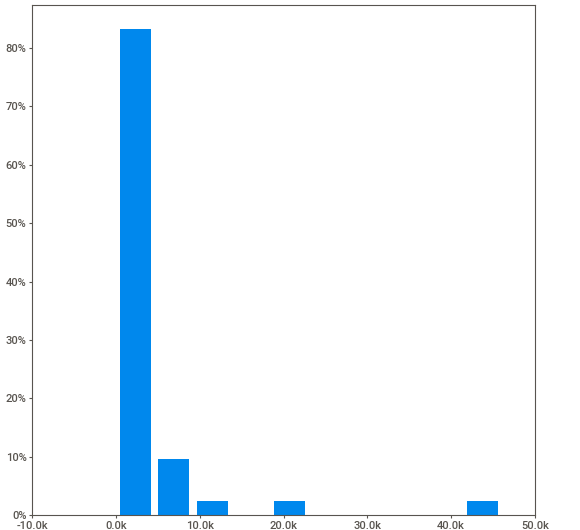
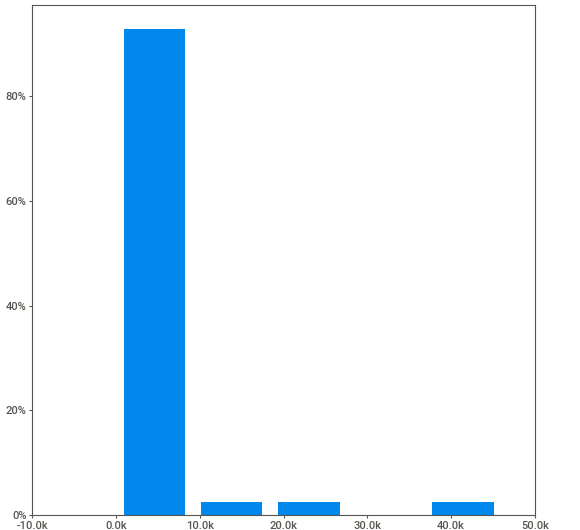
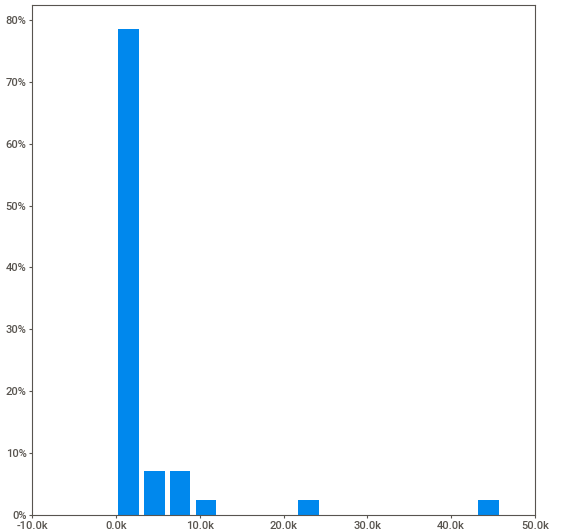
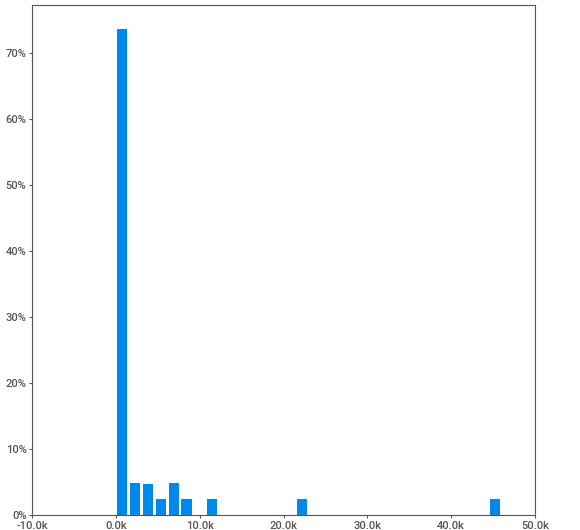
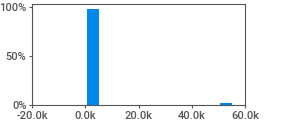
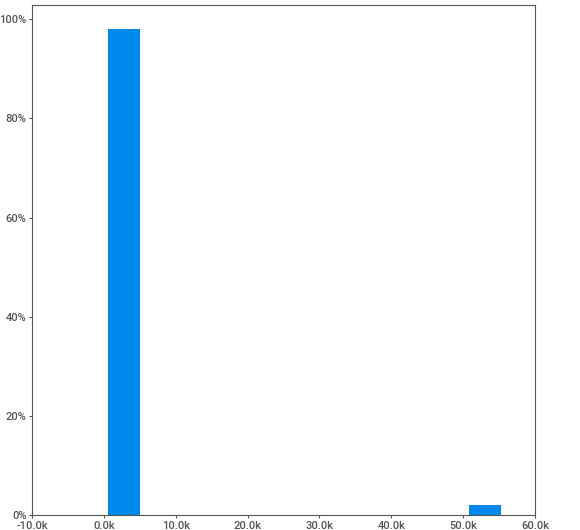
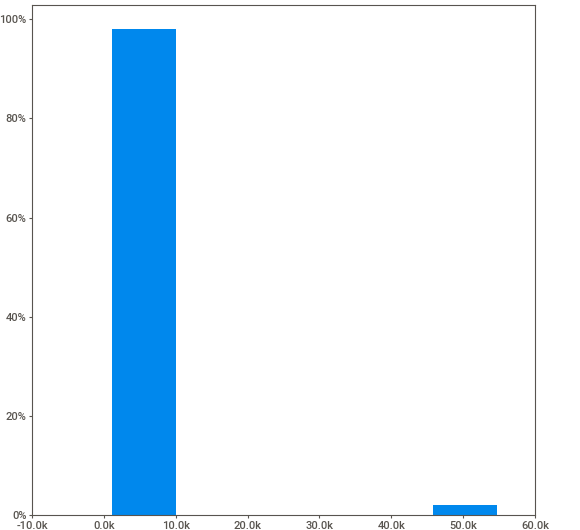
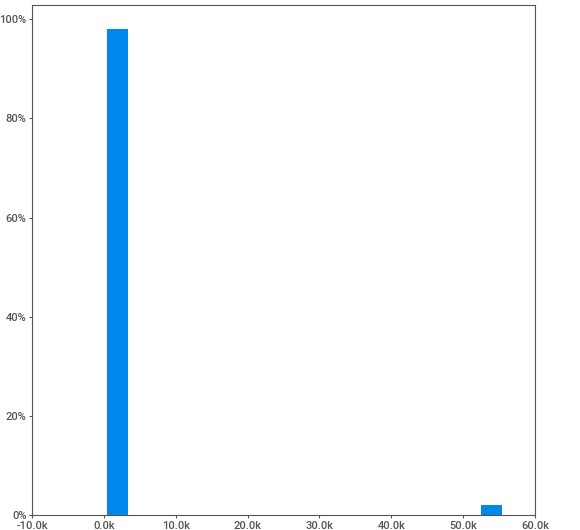
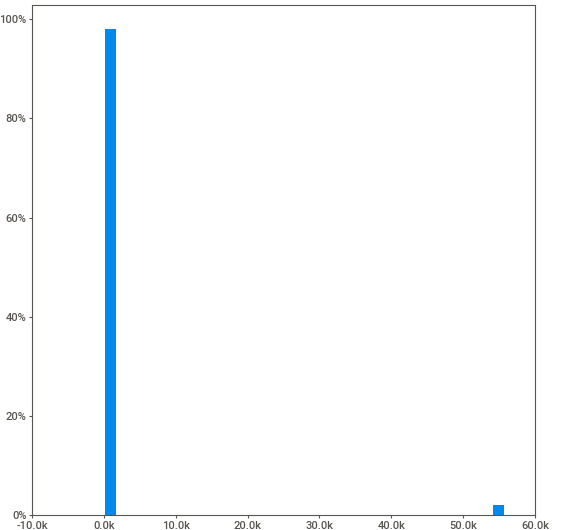
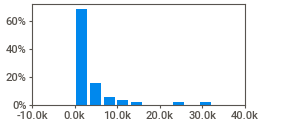
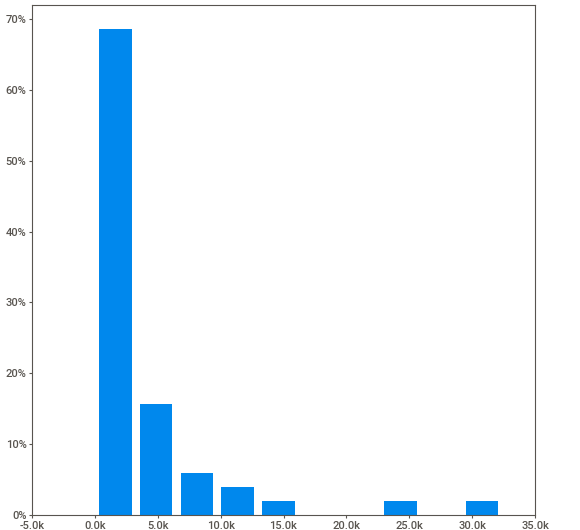
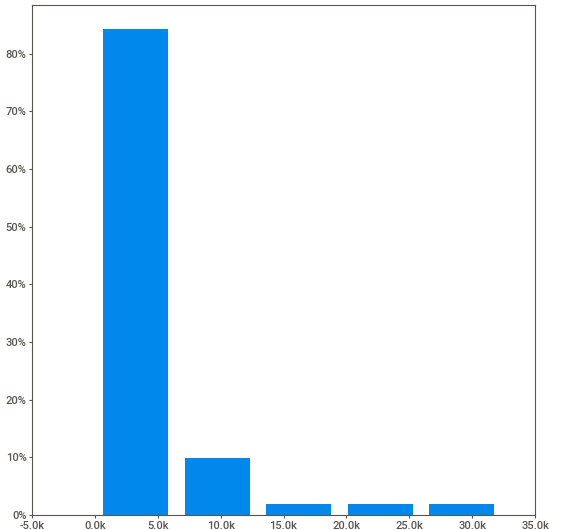
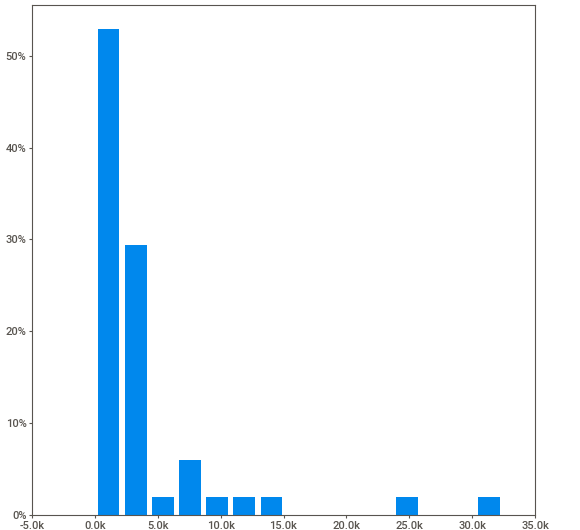
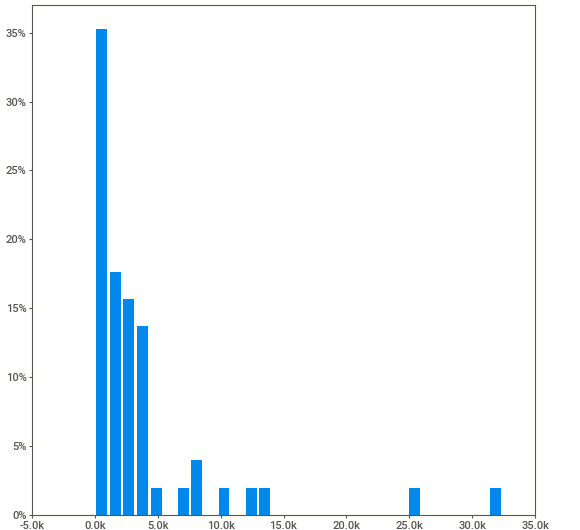
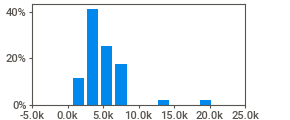
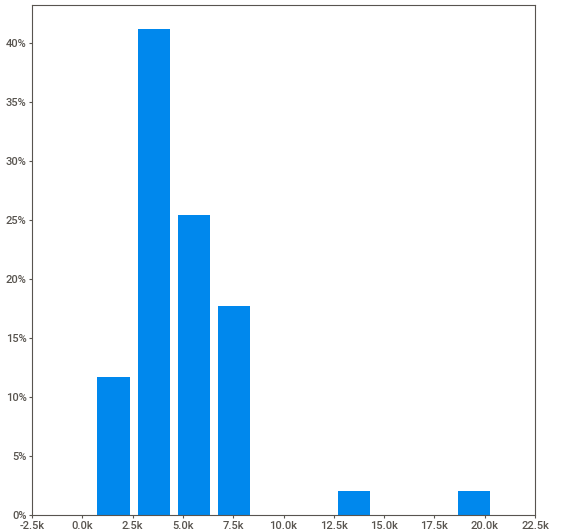
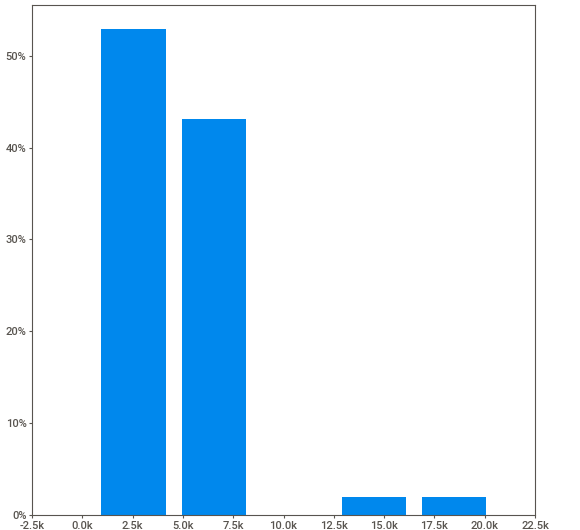
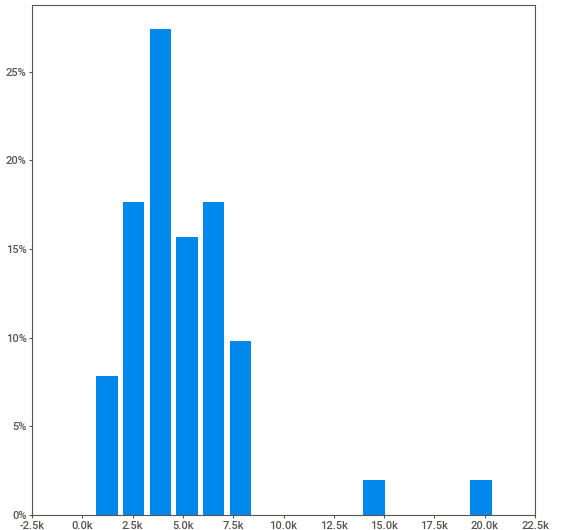
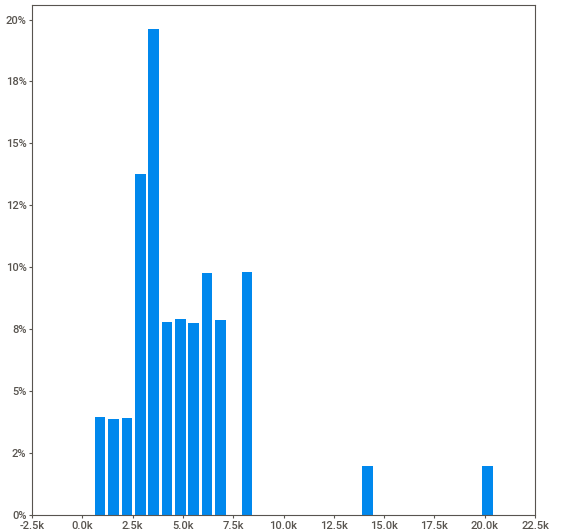
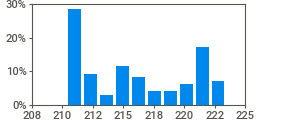
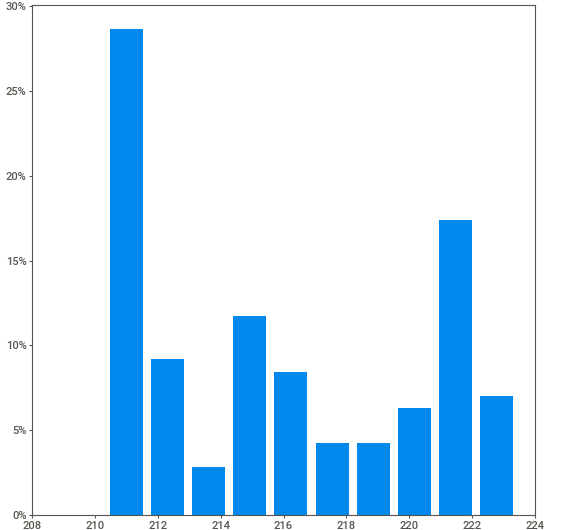
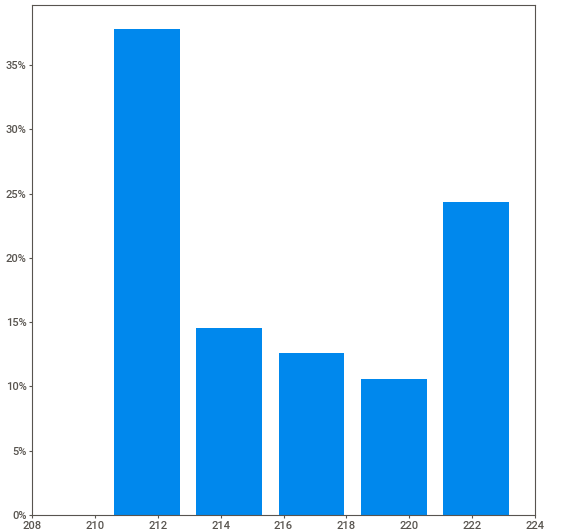
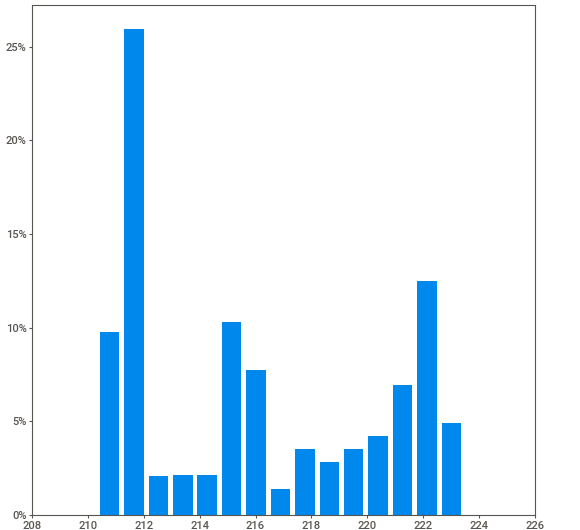
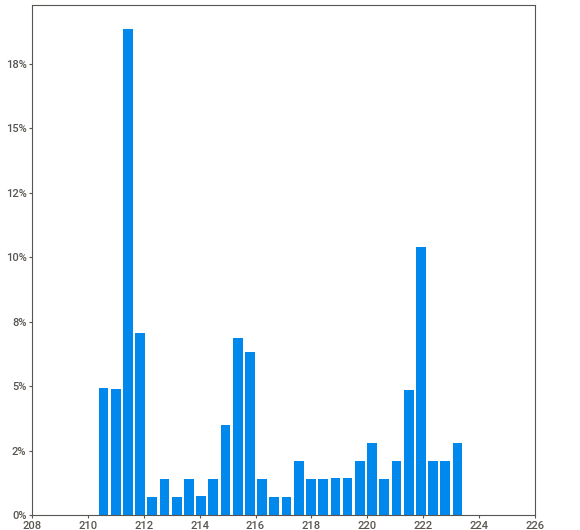
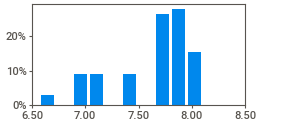
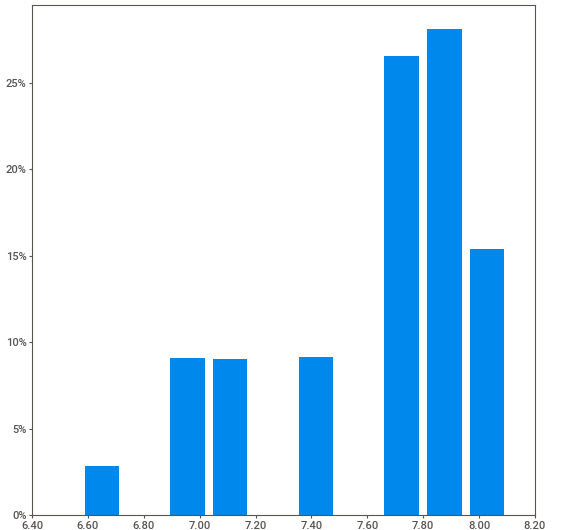
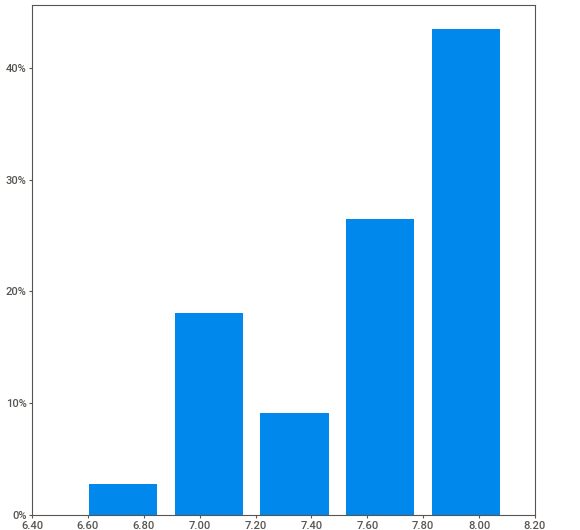
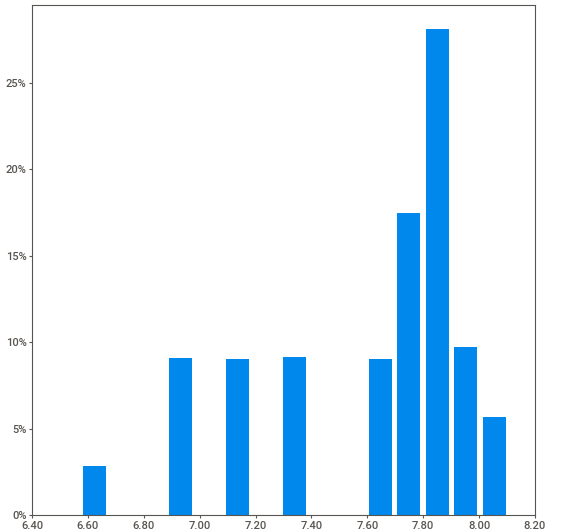
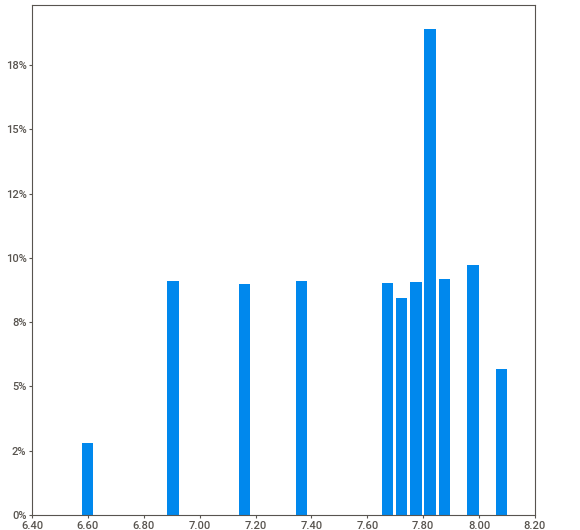
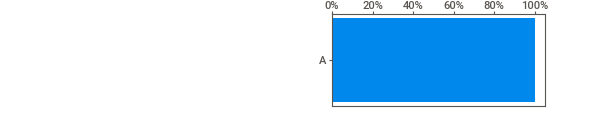
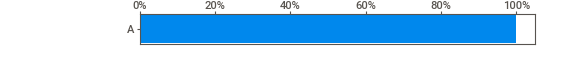
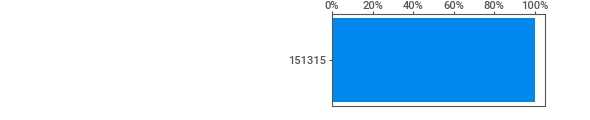
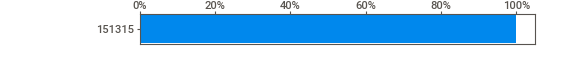
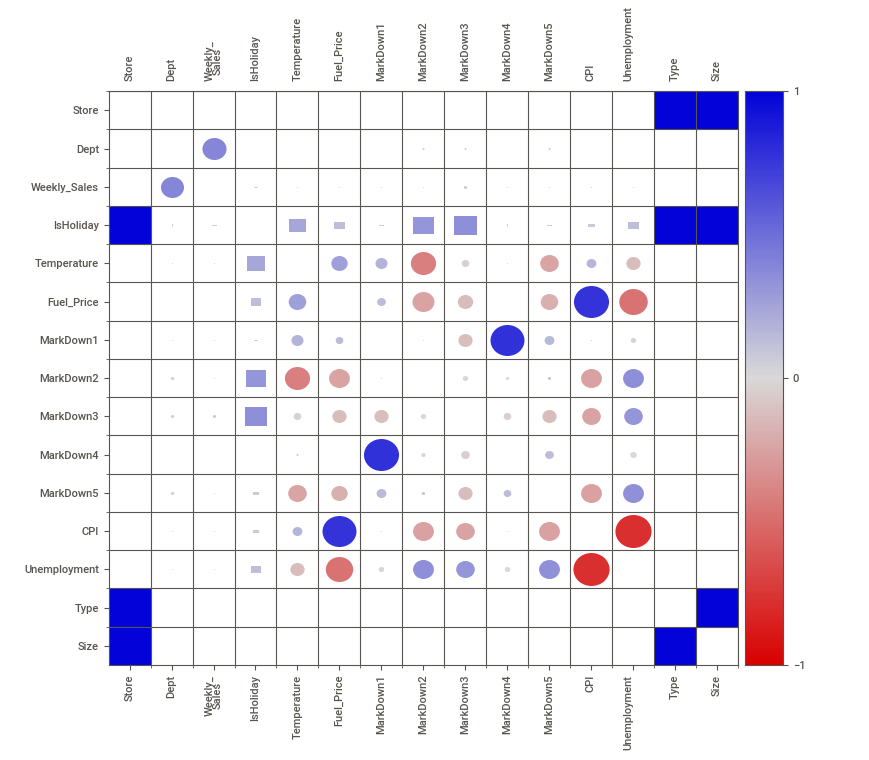
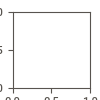

In [ ]:
orig_data_report = sv.analyze(df)
orig_data_report.show_notebook()

1. Click on a feature to tab to explore the feature in more detail.
1. Notice that `SweetViz` calculates the descriptive stats for each feature, along with its missing and duplicate value stats.
1. Notice that `SweetViz` helps to detect numerical vs categorical datatypes.
1. Click on the `ASSOCIATIONS` tab to explore associations/correlations!

super cool

### Prefer a browswer experience?

In [ ]:
orig_data_report.show_html('orig_data_report.html', open_browser=True)

Report orig_data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Now let's have a look at a comparison report of our train and test datasets!

                                             |          | [  0%]   00:00 -> (? left)


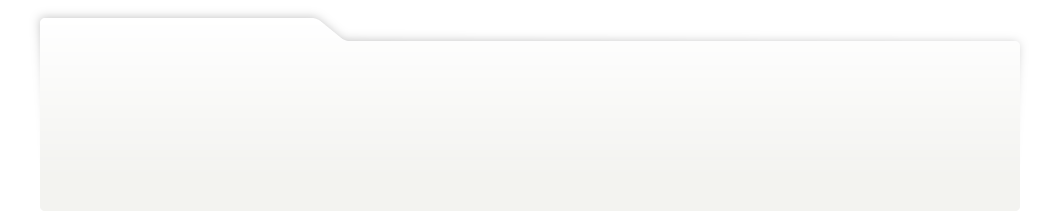
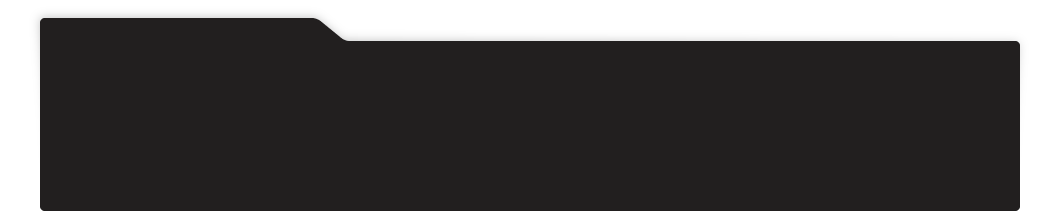
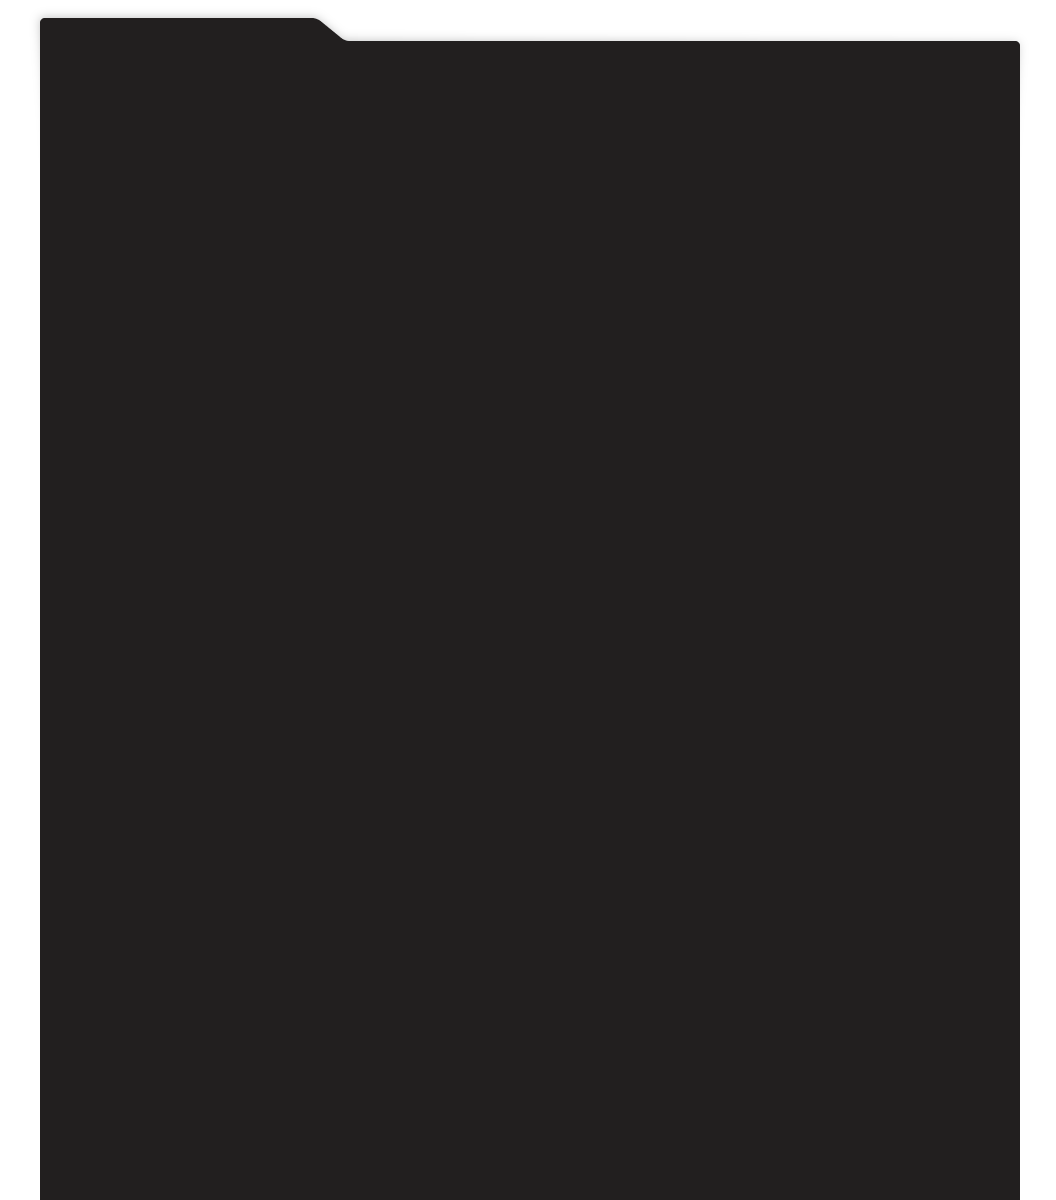
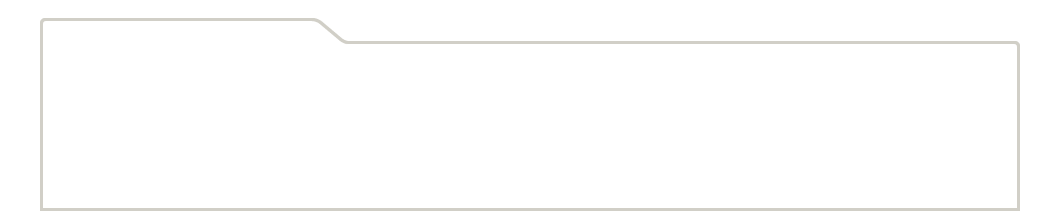
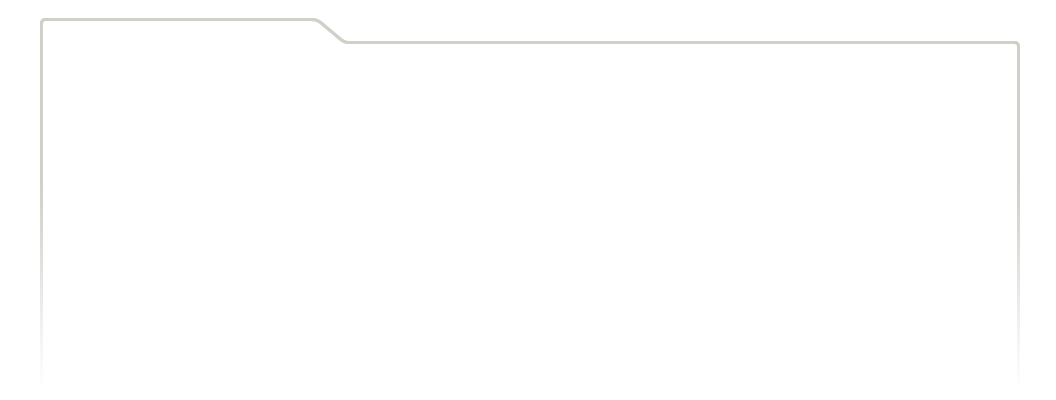
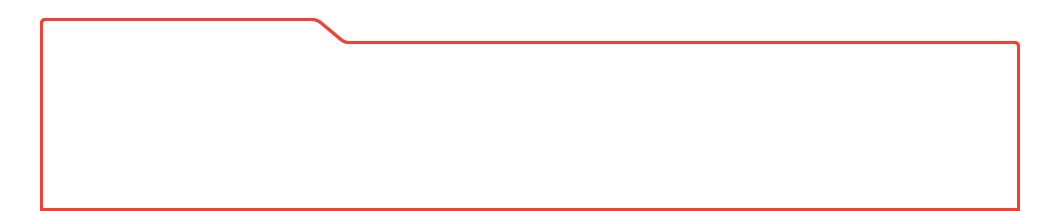
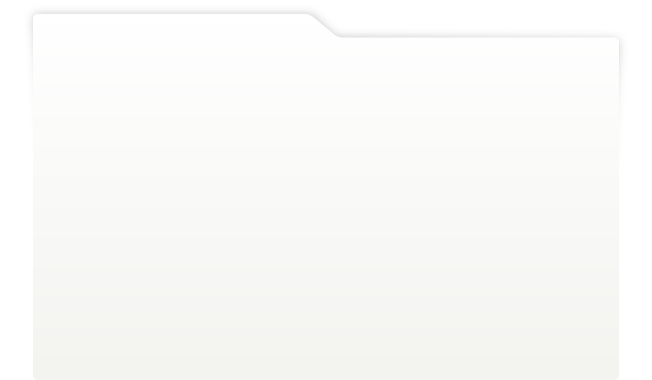
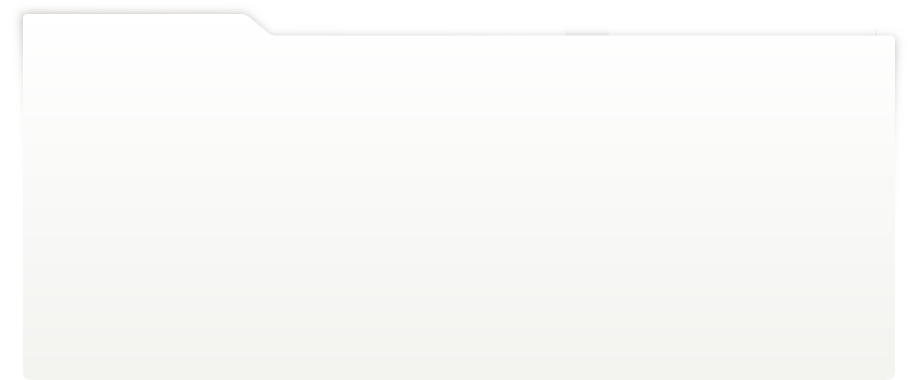
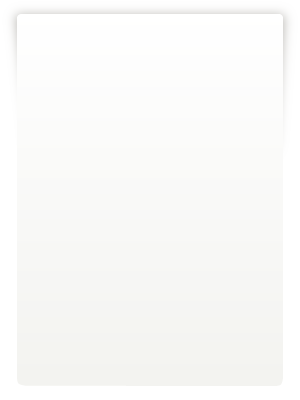
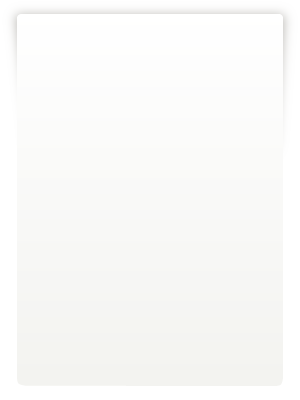
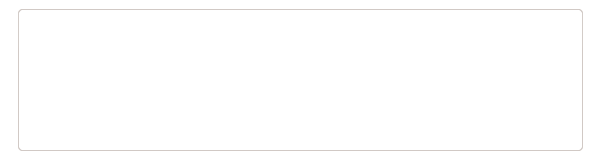
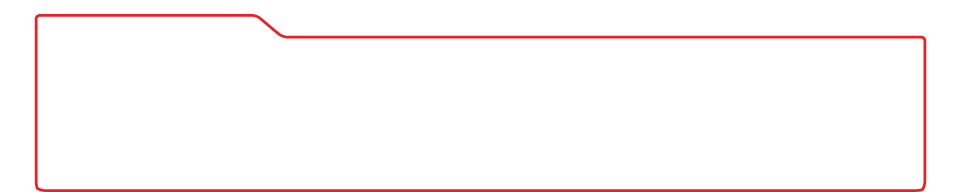
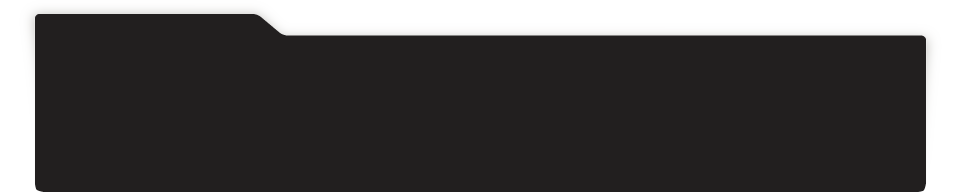
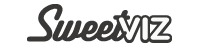
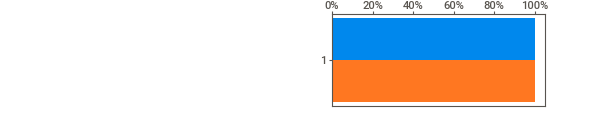
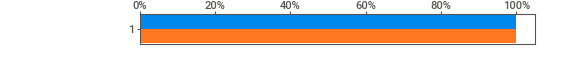
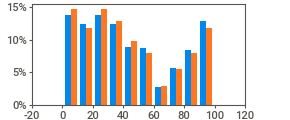
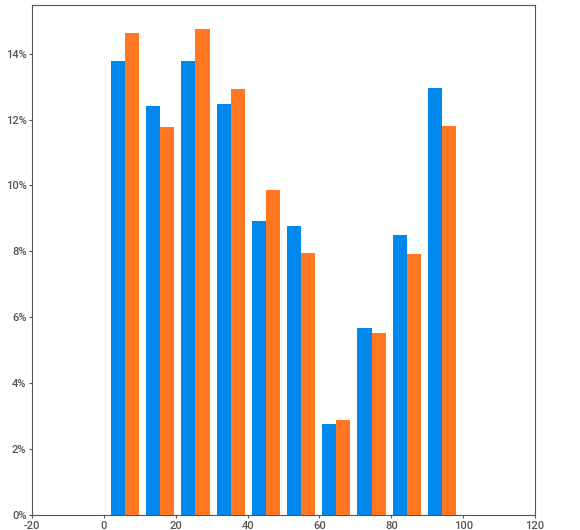
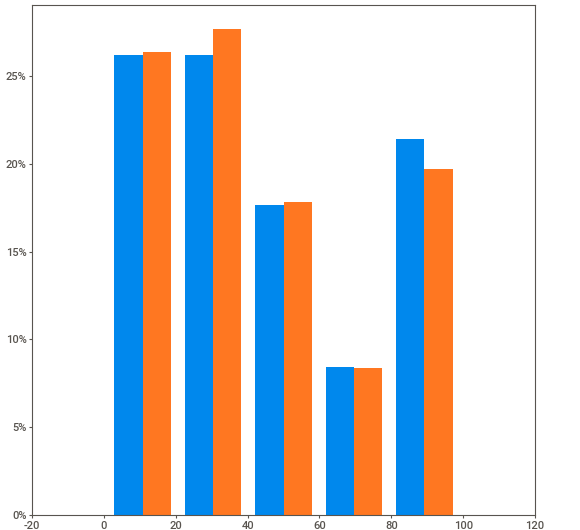
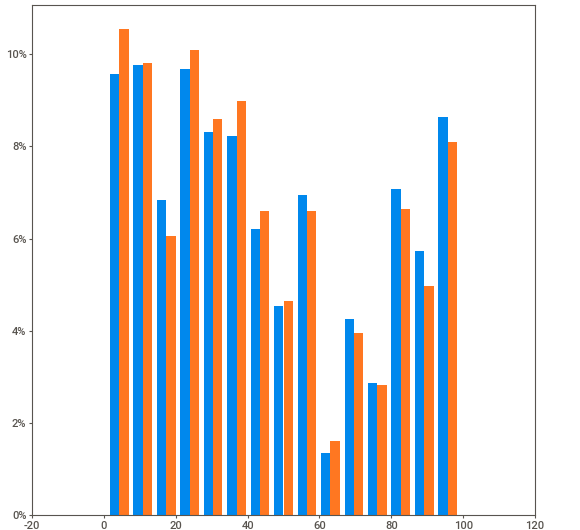
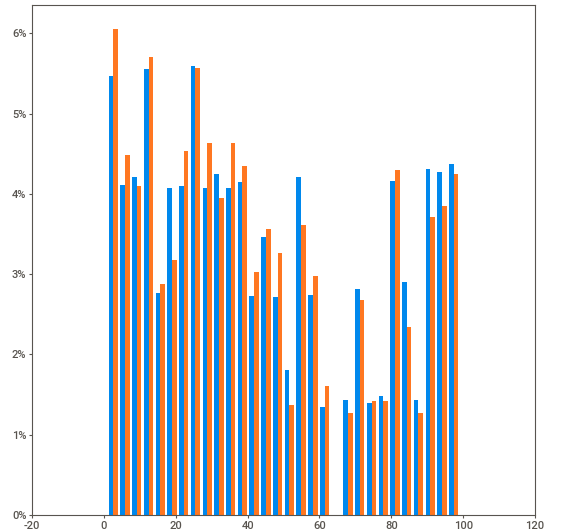
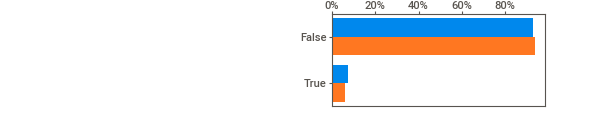
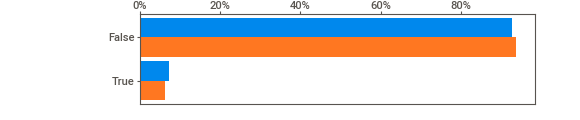
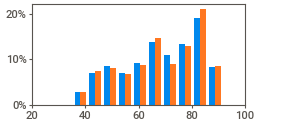
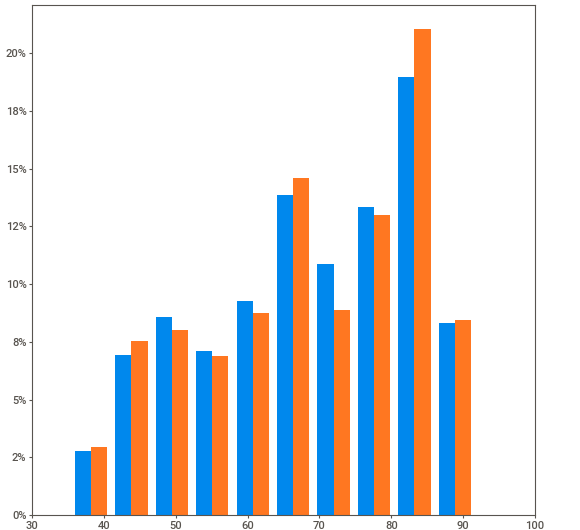
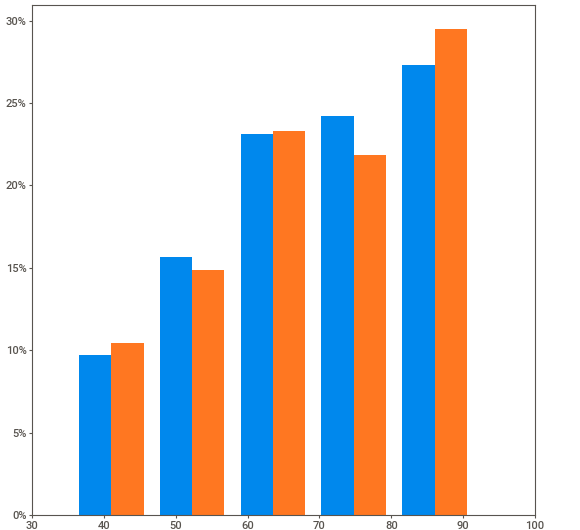
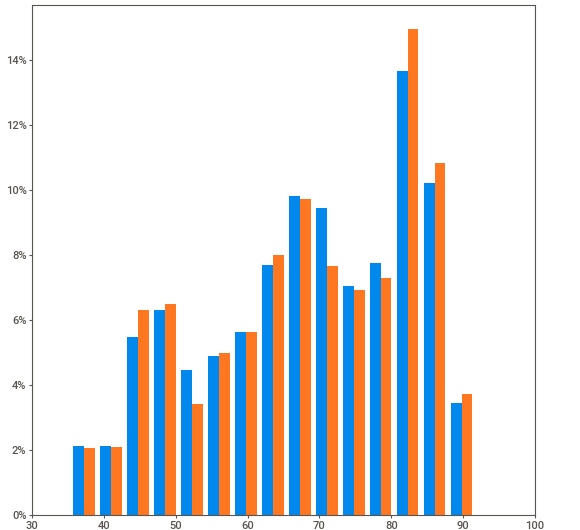
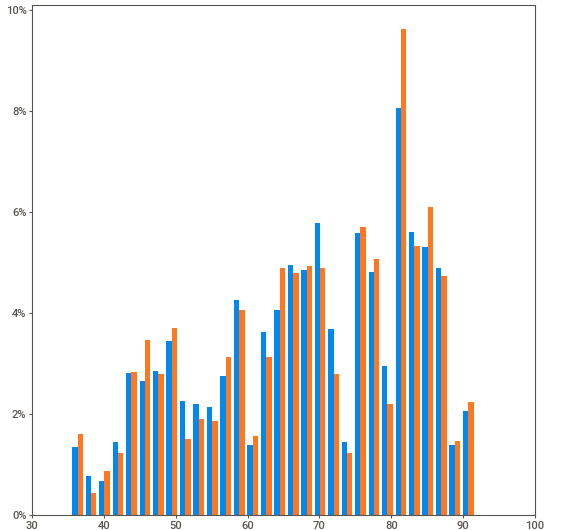
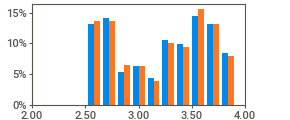
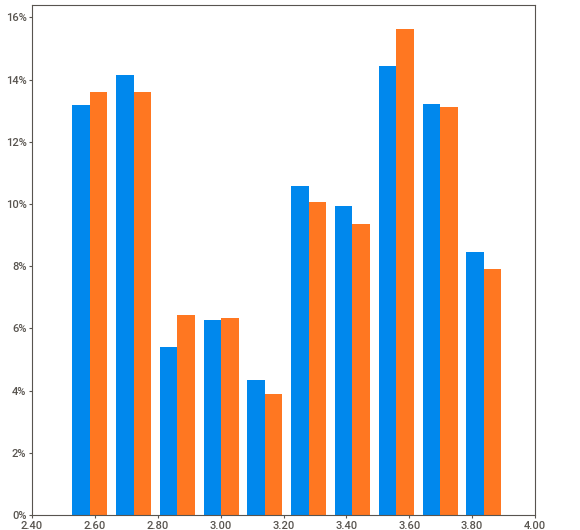
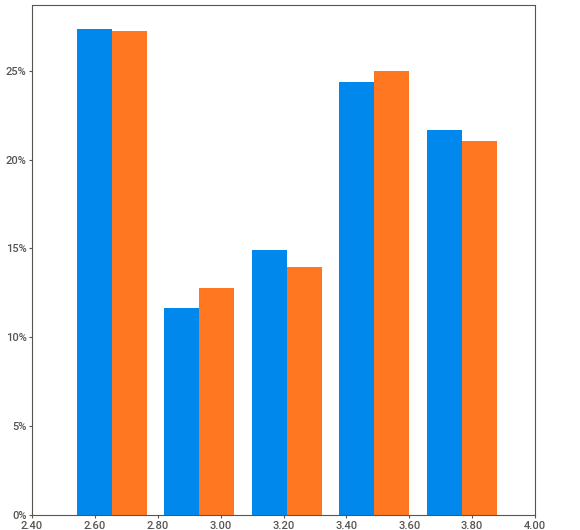
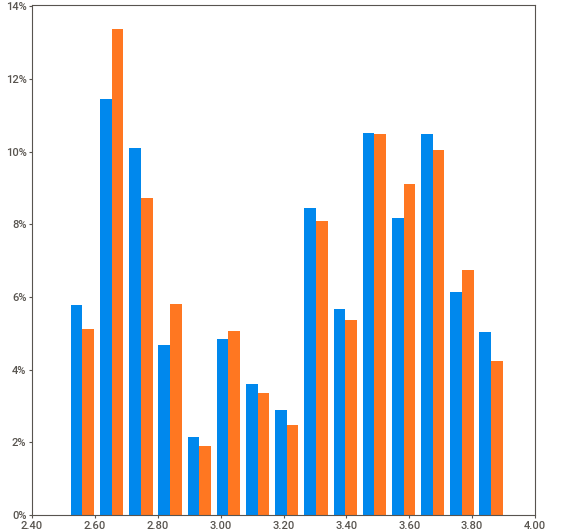
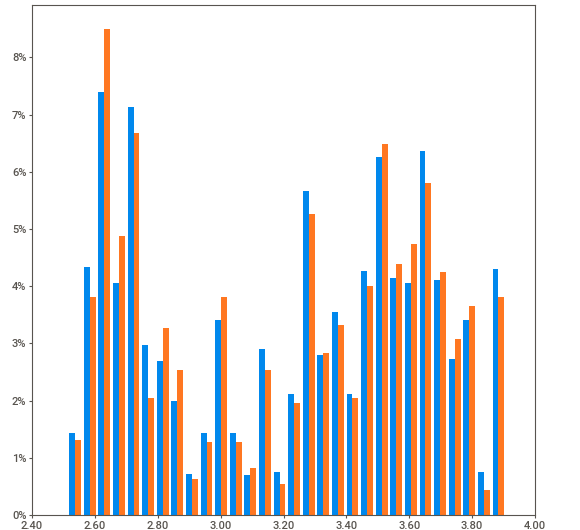
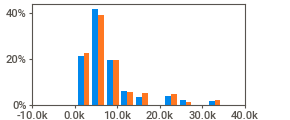
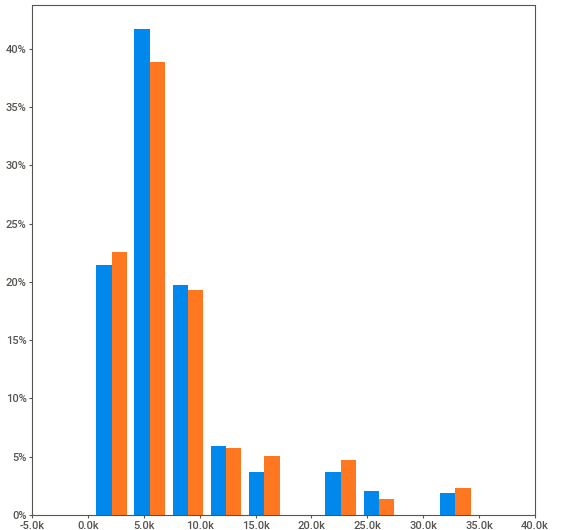
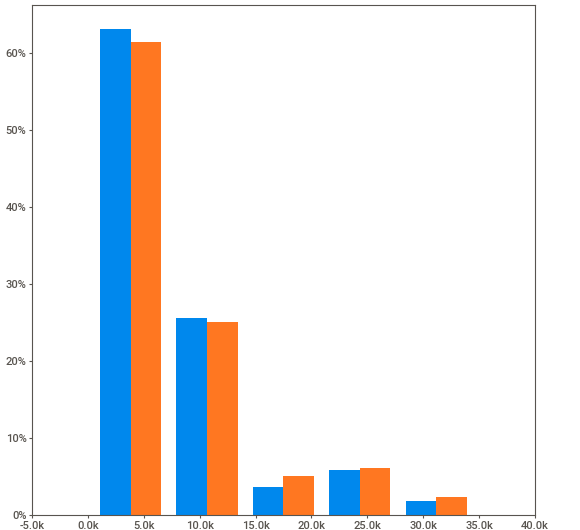
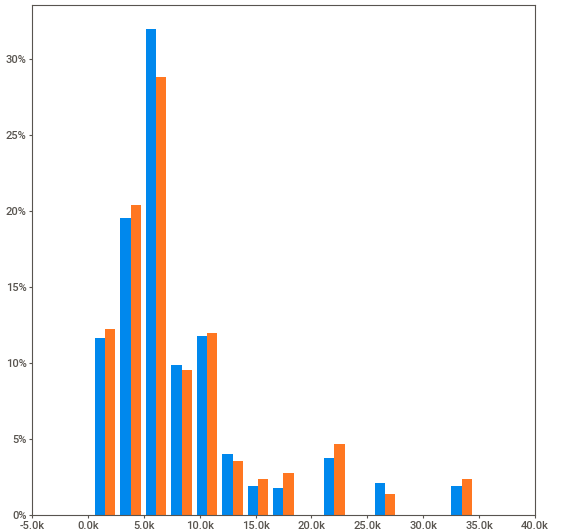
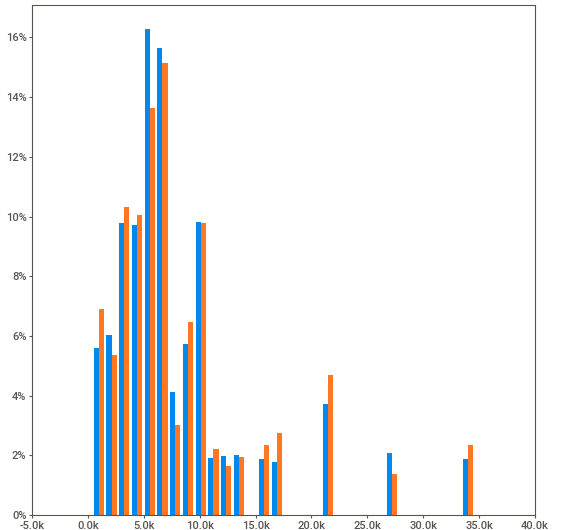
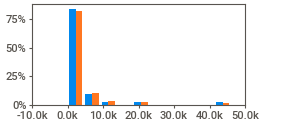
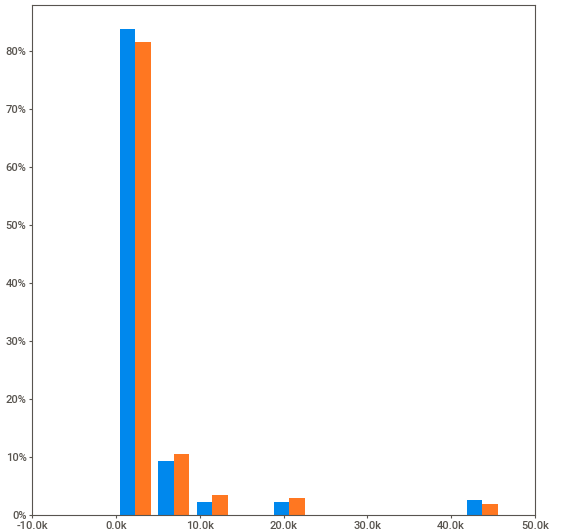
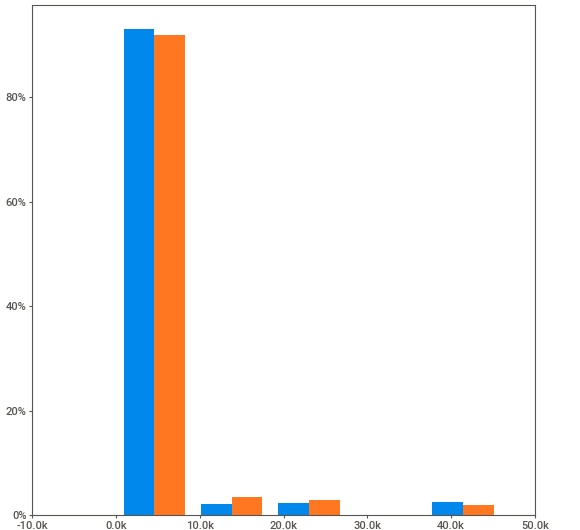
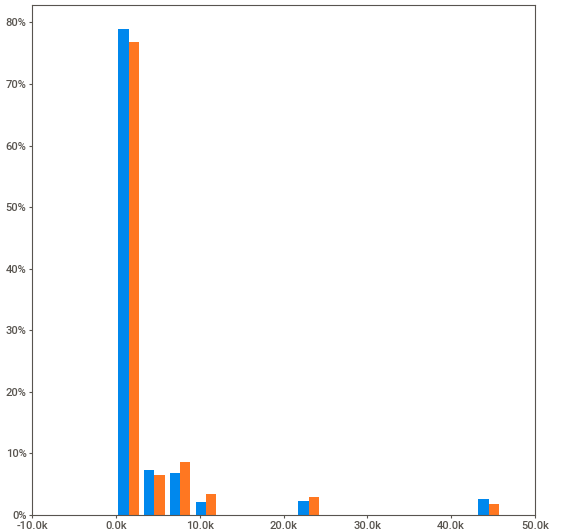
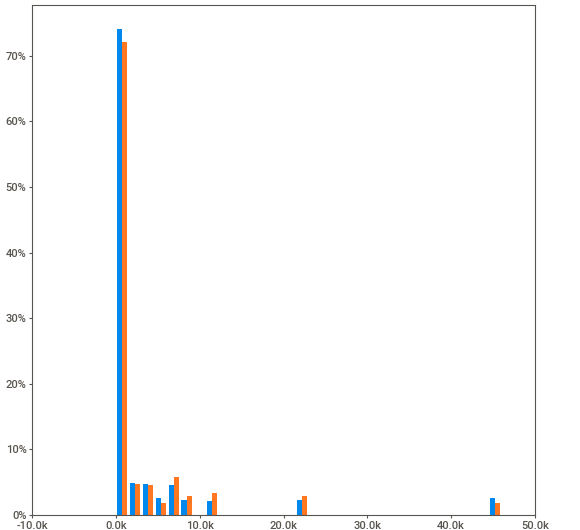
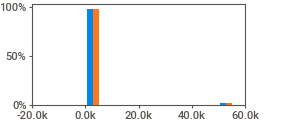
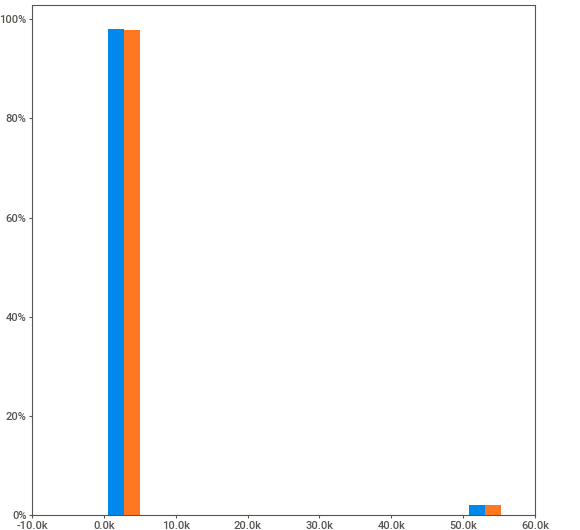
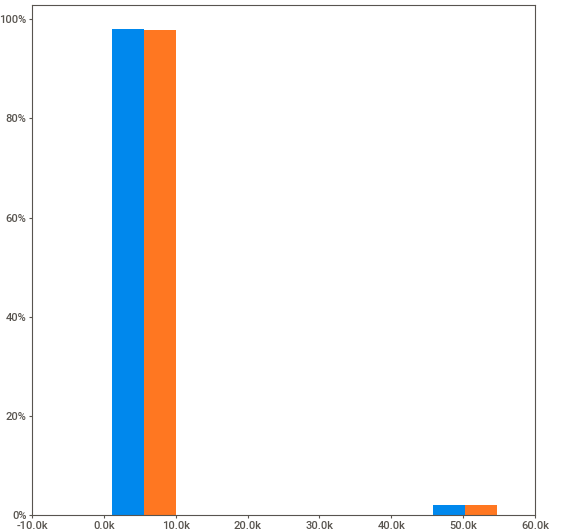
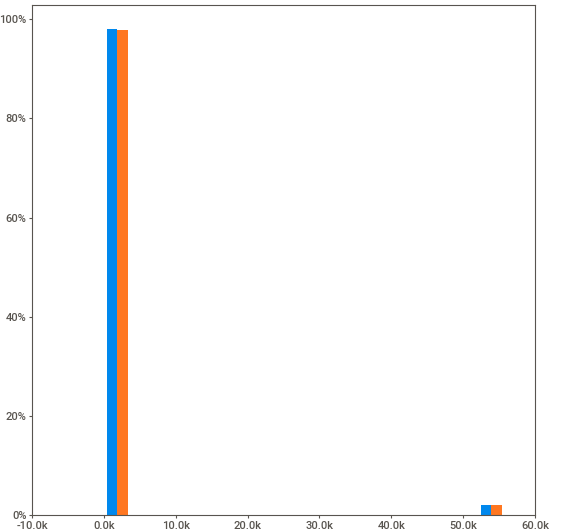
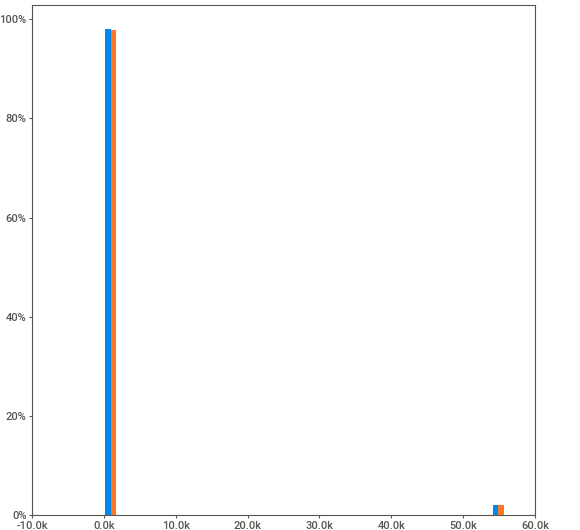
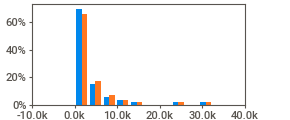
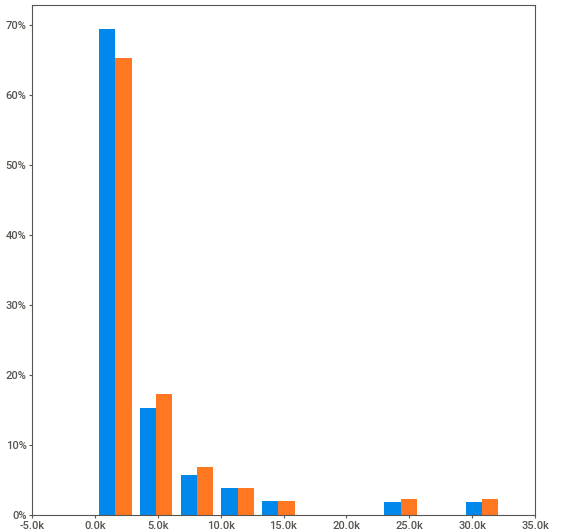
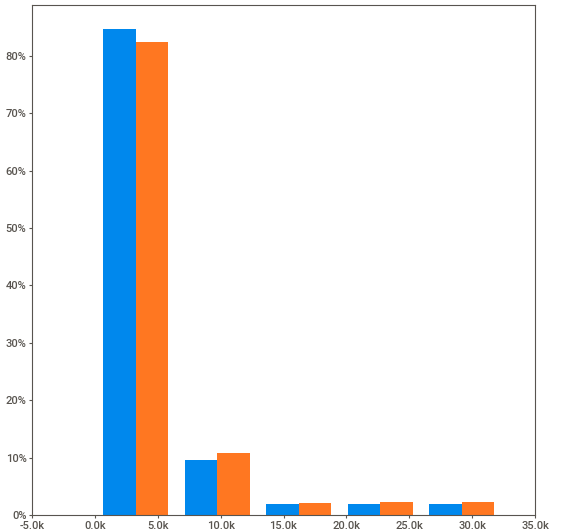
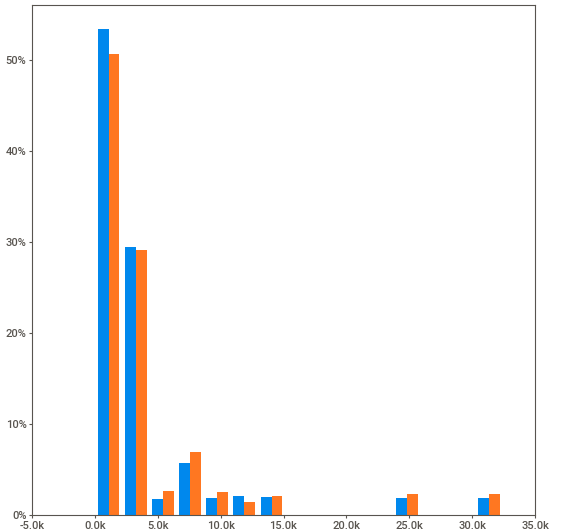
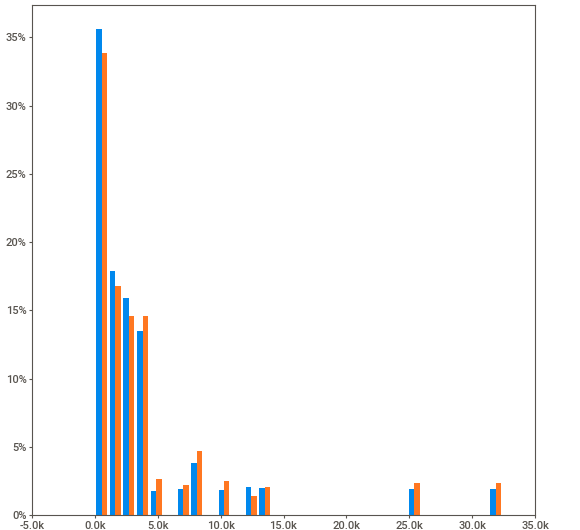
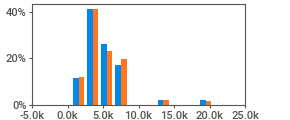
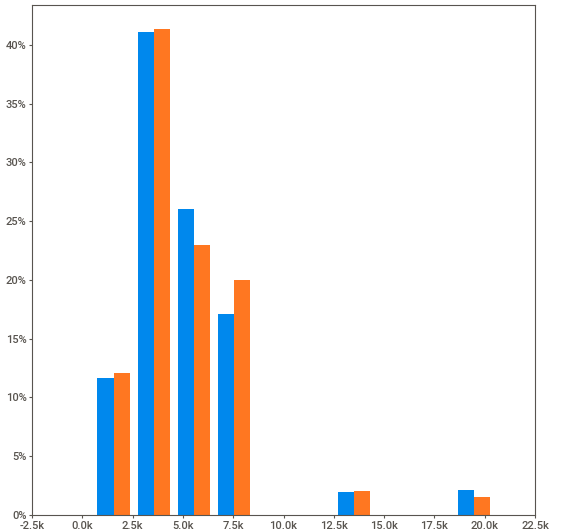
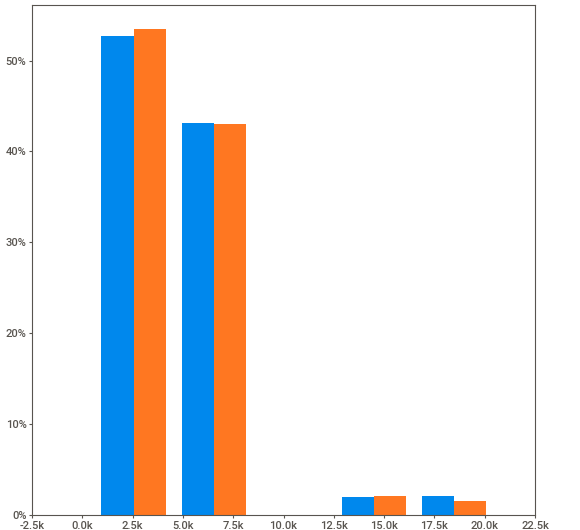
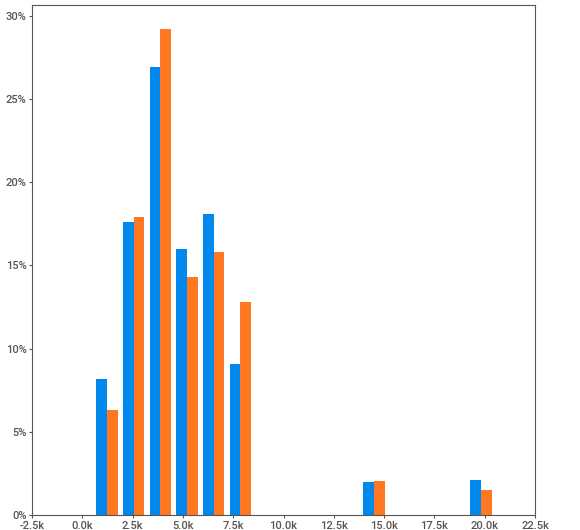
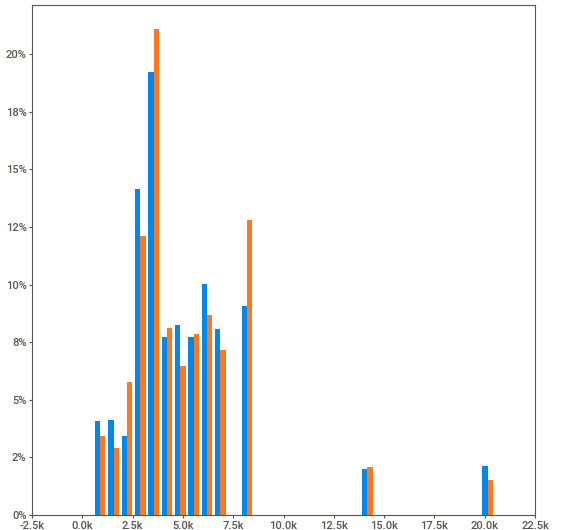
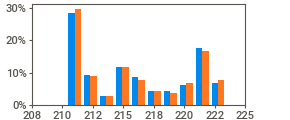
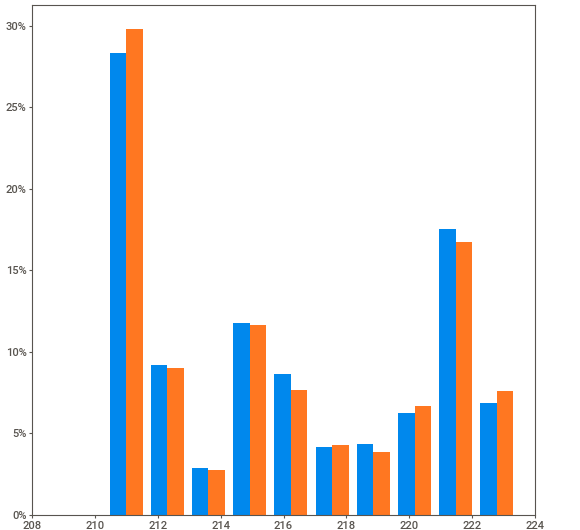
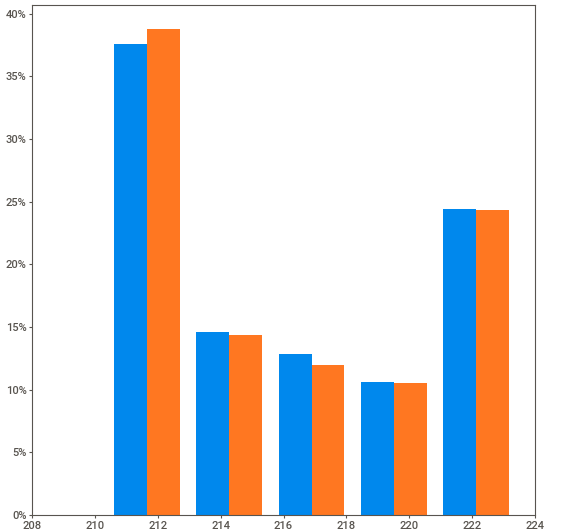
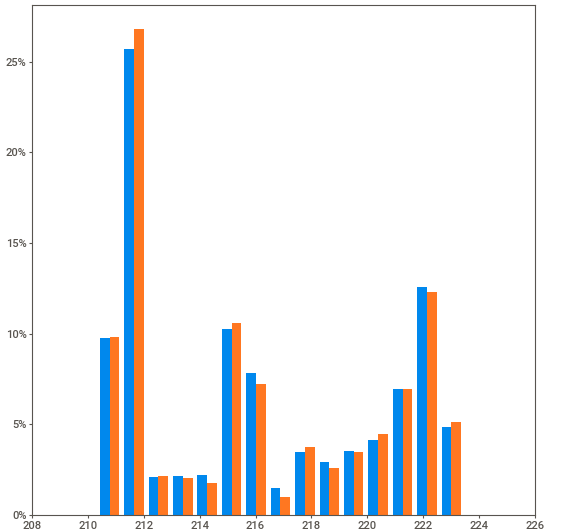
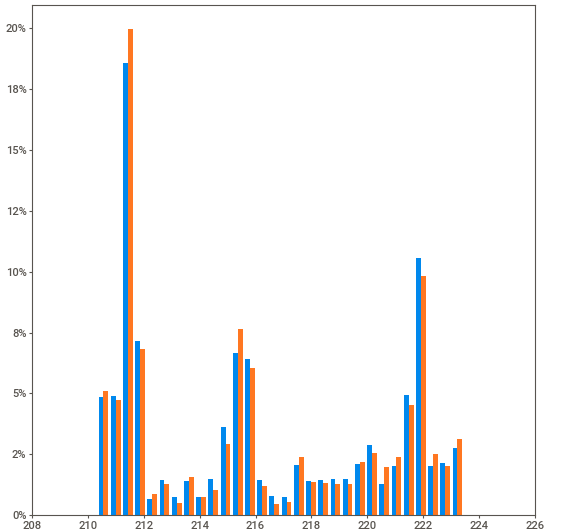
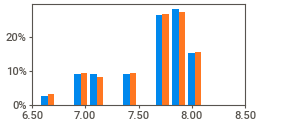
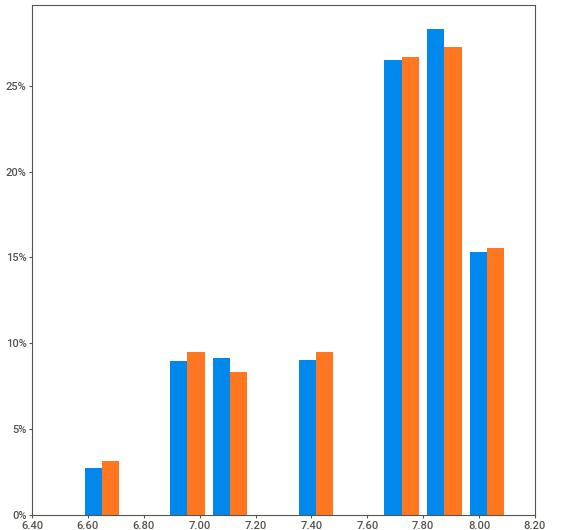
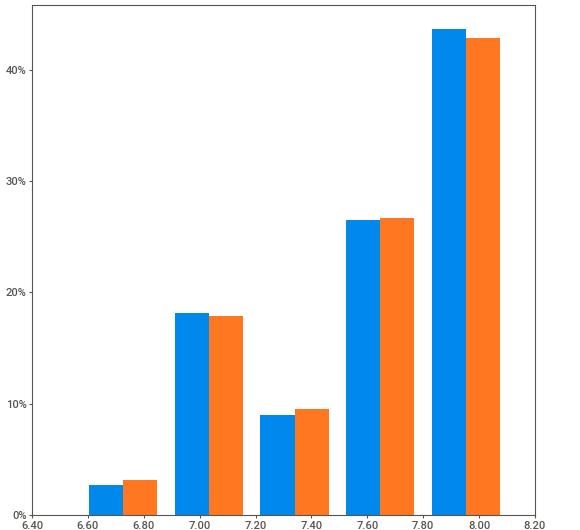
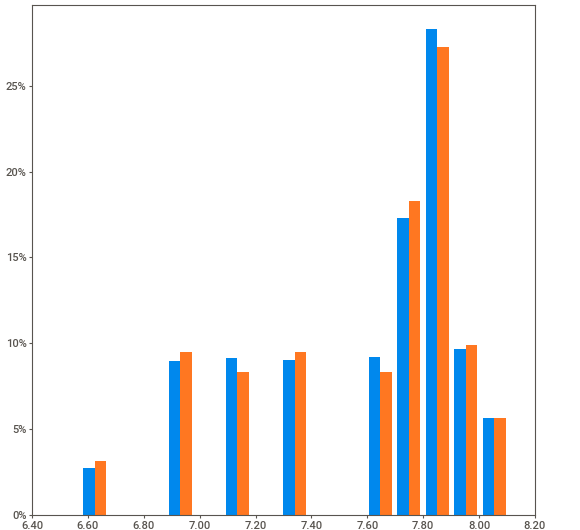
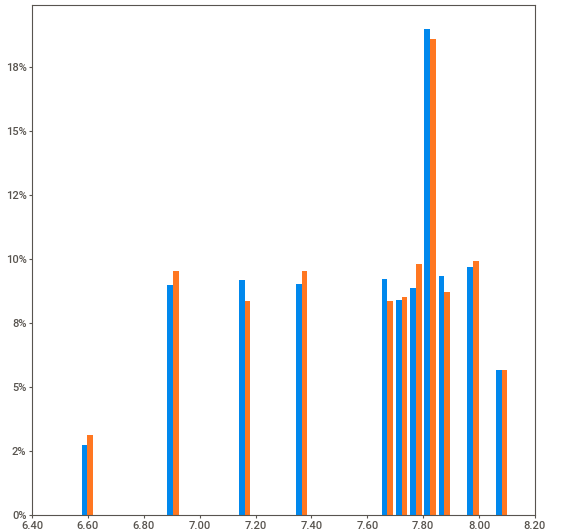
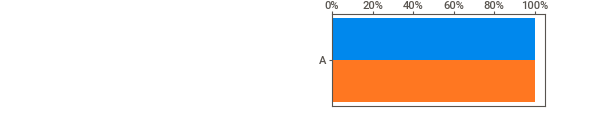
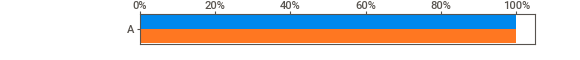
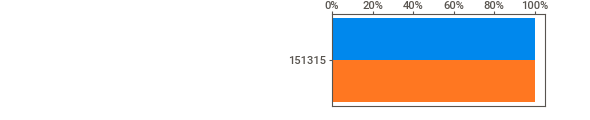
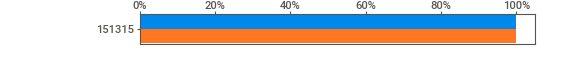
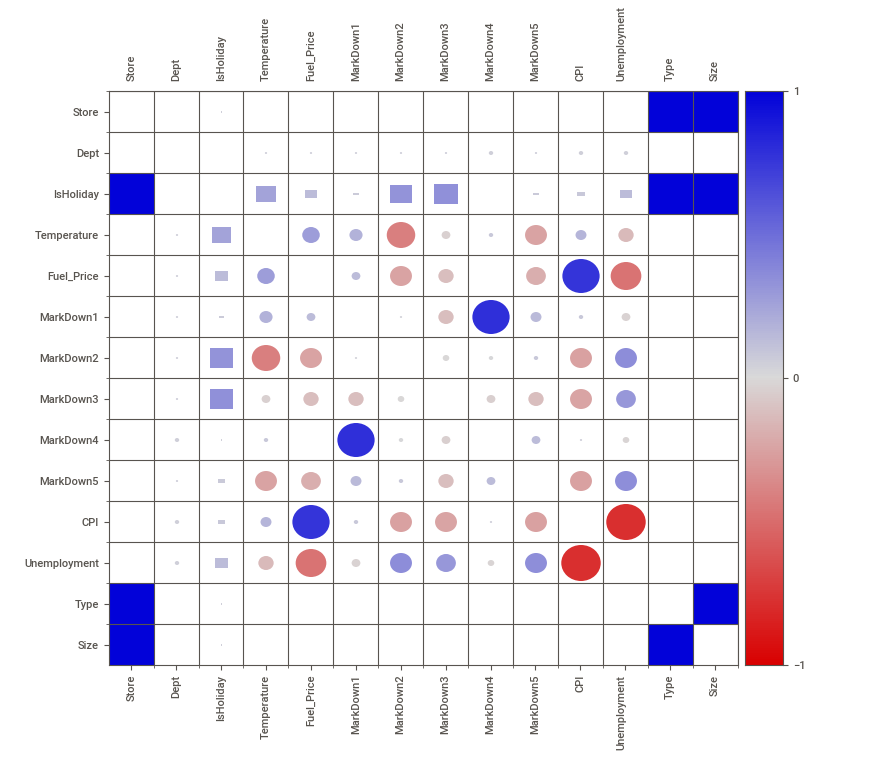
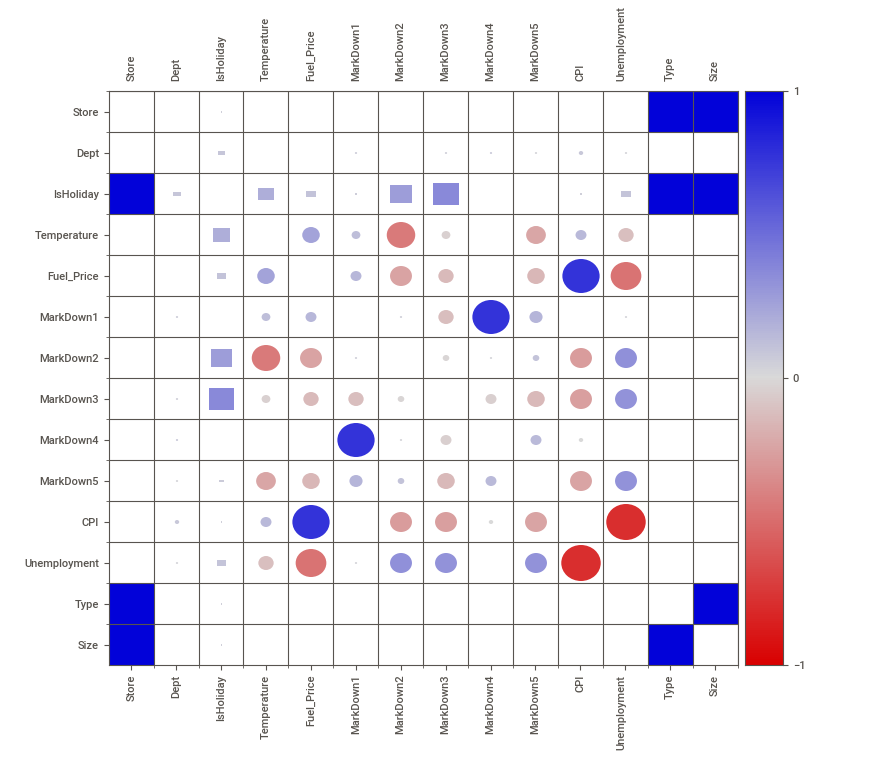

In [ ]:
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare_report.show_notebook()

## Note

- EDA, like other parts of machine learning, is an iterative process, NOT linear.
- This analysis is far from being comprehensive; rather it is a starting point. 
- There does not exist one "standard" way to perform EDA. You should always keep business objectives in mind and perform analysis as seen fit. It is one of those skills that grows with lots of practices.

## **Rubric**
# Q1- Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable. 
# - *What algorithms can be used to automatically select the most important features (regression, etc..)? Describe at least 3?*
There are 3 categories of methods that work for feature selection, with algorithms that work:  
**i) Filter Methods**
- i.e. **Information gain**
- Information gain calculates the reduction in entropy from the transformation of a dataset. 
- It evaluates the Information gain of each variable in the context of the target variable.

- **Correlation coefficient**
- Correlation is a measure of the linear relationship of 2 or more variables.
- enables prediction of one variable from another, and important variables are highly correlated with the target yet uncorrelated among themselves.
- If two variables are correlated, we can predict one from the other. 

**ii) Wrapper Methods **
- **Forward Feature Selection**
- an iterative method using the best performing variable against the target
- and another variable that gives the best performance in combination with the first selected variable.

**- Backward Feature Elimination**
- opposite to the Forward Feature Selection method. 
- use all the features available to build a model then select variables with best evaluation measure value and continue.

**iii) Embedded Methods**
**- LASSO Regularization (L1)**
- Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. 
- Linear model regularization: penalty is applied over the coefficients that multiply each of the predictors.
- L1 can shrink some coefficients to zero (such features can be removed from the model).

- **Random Forests **
- aggregates a specified number of decision trees. 
- The tree-based strategies rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. 
- Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. 
- By pruning trees below a particular node, we can create a subset of the most important features.

# Q2 - Explain data leakage and overfitting (define each)?
*- Explain the effect of data leakage and overfitting on the performance of an ML model.*
- Data Leakage is the scenario where the ML model is already aware of some part of test data after training >>> causes overfitting problem
- Data leakage refers to a mistake that is made by the creator of a machine learning model in which they accidentally share the information between the test and training data sets. Typically, when splitting a data set into testing and training sets, the goal is to ensure that no data is shared between these two sets. Ideally, there is no intersection between these two sets.
- overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit to additional data or predict future observations reliably".  
- An overfitted model is a mathematical model that contains more parameters than can be justified by the data.
- makes results that are "too good to be true"


# - Explain what our outliers in your data?
- An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
- A point beyond an inner fence on either side is considered a mild outlier. A point beyond an outer fence is considered an extreme outlier.
- Outliers in data may contain valuable information. Or be meaningless aberrations caused by measurement and recording errors.

# Explain at least two methods to deal/treat outliers in your data?
- firstly it can be detected by visualising the data (eg. box plots, scatter plots)
- also tests like Shapiro-Wilkson can help you determine the distribution of your data
- 1) Filters deal with outliers, i.e filter large obvious data that does not pertain to your scope of work
- 2) remove outliers in post-test analysis phase or trim (i.e use TrimMean)


# - What is feature scaling and why is it important to our model?
- a method used to normalize the range of independent variables or features of data
- 
# Explain the different between Normalization and Standardization?
- Standardization is setting the mean to zero and the standard deviation to one. 
- Normalization is  translating data into the range [0, 1] (or any other range) or simply transforming data onto the unit sphere.
- When you don’t know the distribution of your data or when you know it’s not Gaussian, normalization is a smart approach to apply. Normalization is useful when your data has variable scales and the technique you’re employing, such as k-nearest neighbors and artificial neural networks, doesn’t make assumptions about the distribution of your data.
When your data has variable dimensions and the technique you’re using (like logistic regression,  linear regression, linear discriminant analysis) standardization is useful.
- Some  algorithms benefit from normalization and standardization (ie. when Euclidean distance is used). 

## References

1. Original dataset is from [kaggle: wallmart sales forecast datasets](https://www.kaggle.com/datasets/iamprateek/wallmart-sales-forecast-datasets)
2. Notebook: [craking the walmart sales forecasting challenge](https://www.kaggle.com/code/fernandol/cracking-the-walmart-sales-forecasting-challenge)
3. Feature Selection Techniques in Machine Learning https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
4. NIST https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
5. Outliers https://cxl.com/blog/outliers/
